# Sales Data Analysis Project

### Importing Datasets

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
apr = pd.read_csv("C:/Users/Alfonse/Desktop/New Python Project/Raw Data/Sales_April_2019.csv")

apr.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Combine all datasets

In [2]:
# Importing other datasets


aug = pd.read_csv("C:/Users/Alfonse/Desktop/New Python Project/Raw Data/Sales_August_2019.csv")

dec = pd.read_csv("C:/Users/Alfonse/Desktop/New Python Project/Raw Data/Sales_December_2019.csv")

feb = pd.read_csv("C:/Users/Alfonse/Desktop/New Python Project/Raw Data/Sales_February_2019.csv")

jan = pd.read_csv("C:/Users/Alfonse/Desktop/New Python Project/Raw Data/Sales_January_2019.csv")

jul = pd.read_csv("C:/Users/Alfonse/Desktop/New Python Project/Raw Data/Sales_July_2019.csv")

jun = pd.read_csv("C:/Users/Alfonse/Desktop/New Python Project/Raw Data/Sales_June_2019.csv")

mar = pd.read_csv("C:/Users/Alfonse/Desktop/New Python Project/Raw Data/Sales_March_2019.csv")

may = pd.read_csv("C:/Users/Alfonse/Desktop/New Python Project/Raw Data/Sales_May_2019.csv")

nov = pd.read_csv("C:/Users/Alfonse/Desktop/New Python Project/Raw Data/Sales_November_2019.csv")

oct = pd.read_csv("C:/Users/Alfonse/Desktop/New Python Project/Raw Data/Sales_October_2019.csv")

sept = pd.read_csv("C:/Users/Alfonse/Desktop/New Python Project/Raw Data/Sales_September_2019.csv")


all_months = pd.concat([apr, aug, dec, feb, jan, jul, jun, mar, may, nov, oct, sept])

all_months

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [3]:
all_months.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


### Data Cleaning

#### Removing null values

In [4]:
# Count of NaN values

all_months.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
# Removing NaN values

all_months = all_months.dropna()

all_months.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### Dropping duplicates

In [6]:
# Dropping duplicates


all_months.duplicated()

0        False
2        False
3        False
4        False
5        False
         ...  
11681    False
11682    False
11683    False
11684    False
11685    False
Length: 186305, dtype: bool

In [7]:
all_months = all_months.drop_duplicates()

#### Converting data types

In [8]:
# Order ID          int
# Quantity Ordered  int
# Price Each        float
# Order Date        int

In [9]:
# Filter out column values similar to column headers

all_months = all_months[all_months['Order ID'] != 'Order ID']

In [10]:
# Convert column data types

all_months['Order ID'] = pd.to_numeric(all_months['Order ID'])
all_months['Quantity Ordered'] = pd.to_numeric(all_months['Quantity Ordered'])
all_months['Price Each'] = pd.to_numeric(all_months['Price Each'])
all_months['Order Date'] = pd.to_datetime(all_months['Order Date'])

all_months.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  int64         
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int64         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.9+ MB


In [11]:
all_months.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


#### Breaking out address

In [12]:
all_months['Purchase Address'].head()

0            917 1st St, Dallas, TX 75001
2       682 Chestnut St, Boston, MA 02215
3    669 Spruce St, Los Angeles, CA 90001
4    669 Spruce St, Los Angeles, CA 90001
5       333 8th St, Los Angeles, CA 90001
Name: Purchase Address, dtype: object

In [13]:
# Create 3 columns for separating address

all_months[['Address', 'City', 'State']] = all_months['Purchase Address'].str.split(',', expand = True)

all_months

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Address,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",333 8th St,Los Angeles,CA 90001
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",840 Highland St,Los Angeles,CA 90001
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",216 Dogwood St,San Francisco,CA 94016
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",220 12th St,San Francisco,CA 94016
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",511 Forest St,San Francisco,CA 94016


In [14]:
# Separate state and zipcode from state column

all_months['State1'] = all_months['State'].str[0:3]
all_months['Zipcode'] = all_months['State'].str[3:]


all_months

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Address,City,State,State1,Zipcode
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",917 1st St,Dallas,TX 75001,TX,75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",682 Chestnut St,Boston,MA 02215,MA,02215
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA 90001,CA,90001
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA 90001,CA,90001
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",333 8th St,Los Angeles,CA 90001,CA,90001
...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",840 Highland St,Los Angeles,CA 90001,CA,90001
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",216 Dogwood St,San Francisco,CA 94016,CA,94016
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",220 12th St,San Francisco,CA 94016,CA,94016
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",511 Forest St,San Francisco,CA 94016,CA,94016


In [15]:
# Removing columns

all_months = all_months.drop(columns=['Purchase Address', 'State'], axis = 1)

all_months

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Address,City,State1,Zipcode
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,917 1st St,Dallas,TX,75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,682 Chestnut St,Boston,MA,02215
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,669 Spruce St,Los Angeles,CA,90001
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,669 Spruce St,Los Angeles,CA,90001
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,333 8th St,Los Angeles,CA,90001
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,840 Highland St,Los Angeles,CA,90001
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,216 Dogwood St,San Francisco,CA,94016
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,220 12th St,San Francisco,CA,94016
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,511 Forest St,San Francisco,CA,94016


In [16]:
all_months.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 11685
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  int64         
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int64         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Address           185686 non-null  object        
 6   City              185686 non-null  object        
 7   State1            185686 non-null  object        
 8   Zipcode           185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 14.2+ MB


In [17]:
# Renaming column

all_months.rename(columns = {'State1':'State'}, inplace = True)

all_months.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Address,City,State,Zipcode
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,917 1st St,Dallas,TX,75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,682 Chestnut St,Boston,MA,02215
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,669 Spruce St,Los Angeles,CA,90001
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,669 Spruce St,Los Angeles,CA,90001
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,333 8th St,Los Angeles,CA,90001


In [18]:
all_months.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 11685
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  int64         
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int64         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Address           185686 non-null  object        
 6   City              185686 non-null  object        
 7   State             185686 non-null  object        
 8   Zipcode           185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 14.2+ MB


In [19]:
# Change city and state column data types to string

all_months['City'] = all_months['City'].astype('string')
all_months['State'] = all_months['State'].astype('string')


In [20]:
all_months['State'].unique()

<StringArray>
[' TX', ' MA', ' CA', ' WA', ' GA', ' NY', ' OR', ' ME']
Length: 8, dtype: string

In [21]:
# Fix state values
all_months['State'] = all_months['State'].map(lambda x: 'California' if (x == ' CA') else x)
all_months['State'] = all_months['State'].map(lambda x: 'New York' if (x == ' NY') else x)
all_months['State'] = all_months['State'].map(lambda x: 'Texas' if (x == ' TX') else x)
all_months['State'] = all_months['State'].map(lambda x: 'Massachusetts' if (x == ' MA') else x)
all_months['State'] = all_months['State'].map(lambda x: 'Georgia' if (x == ' GA') else x)
all_months['State'] = all_months['State'].map(lambda x: 'Washington' if (x == ' WA') else x)
all_months['State'] = all_months['State'].map(lambda x: 'Oregon' if (x == ' OR') else x)
all_months['State'] = all_months['State'].map(lambda x: 'Maine' if (x == ' ME') else x)

all_months['State'].unique()


array(['Texas', 'Massachusetts', 'California', 'Washington', 'Georgia',
       'New York', 'Oregon', 'Maine'], dtype=object)

In [22]:
all_months.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 11685
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  int64         
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int64         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Address           185686 non-null  object        
 6   City              185686 non-null  string        
 7   State             185686 non-null  object        
 8   Zipcode           185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4), string(1)
memory usage: 14.2+ MB


#### Adding sales column

In [23]:
# Add sales column by multiplying the price and product quantity ordered

all_months['Sales'] = all_months['Price Each'] * all_months['Quantity Ordered']

all_months.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Address,City,State,Zipcode,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,917 1st St,Dallas,Texas,75001,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,682 Chestnut St,Boston,Massachusetts,02215,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,669 Spruce St,Los Angeles,California,90001,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,669 Spruce St,Los Angeles,California,90001,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,333 8th St,Los Angeles,California,90001,11.99


#### Splitting date and time in order date column

In [24]:
# Separate date and time in order date column

all_months['New Order Date'] = all_months['Order Date'].dt.strftime('%m-%d-%y').str.split(" ", expand=True)
all_months['Hour'] = all_months['Order Date'].dt.hour
all_months['Minute'] = all_months['Order Date'].dt.minute

all_months.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Address,City,State,Zipcode,Sales,New Order Date,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,917 1st St,Dallas,Texas,75001,23.90,04-19-19,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,682 Chestnut St,Boston,Massachusetts,02215,99.99,04-07-19,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,669 Spruce St,Los Angeles,California,90001,600.00,04-12-19,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,669 Spruce St,Los Angeles,California,90001,11.99,04-12-19,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,333 8th St,Los Angeles,California,90001,11.99,04-30-19,9,27


In [25]:
# Remove order date column

all_months = all_months.drop(columns=['Order Date'], axis = 1)

In [26]:
# Rename column

all_months.rename(columns = {'Order ID': 'Order_ID', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'New Order Date': 'Order_Date'}, inplace = True)

all_months.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Address,City,State,Zipcode,Sales,Order_Date,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,917 1st St,Dallas,Texas,75001,23.90,04-19-19,8,46
2,176559,Bose SoundSport Headphones,1,99.99,682 Chestnut St,Boston,Massachusetts,02215,99.99,04-07-19,22,30
3,176560,Google Phone,1,600.00,669 Spruce St,Los Angeles,California,90001,600.00,04-12-19,14,38
4,176560,Wired Headphones,1,11.99,669 Spruce St,Los Angeles,California,90001,11.99,04-12-19,14,38
5,176561,Wired Headphones,1,11.99,333 8th St,Los Angeles,California,90001,11.99,04-30-19,9,27


In [27]:
# Reorder columns

all_months = all_months[['Order_ID', 'Product', 'Price_Each', 'Quantity_Ordered', 'Sales', 'Order_Date', 'Hour', 'Minute', 'Address', 'City', 'State', 'Zipcode']]

all_months.head()

,Order_ID,Product,Price_Each,Quantity_Ordered,Sales,Order_Date,Hour,Minute,Address,City,State,Zipcode
0,176558,USB-C Charging Cable,11.95,2,23.90,04-19-19,8,46,917 1st St,Dallas,Texas,75001
2,176559,Bose SoundSport Headphones,99.99,1,99.99,04-07-19,22,30,682 Chestnut St,Boston,Massachusetts,02215
3,176560,Google Phone,600.00,1,600.00,04-12-19,14,38,669 Spruce St,Los Angeles,California,90001
4,176560,Wired Headphones,11.99,1,11.99,04-12-19,14,38,669 Spruce St,Los Angeles,California,90001
5,176561,Wired Headphones,11.99,1,11.99,04-30-19,9,27,333 8th St,Los Angeles,California,90001


In [28]:
# Convert order date column data type into datetime

all_months['Order_Date'] = pd.to_datetime(all_months['Order_Date'])

all_months

,Order_ID,Product,Price_Each,Quantity_Ordered,Sales,Order_Date,Hour,Minute,Address,City,State,Zipcode
0,176558,USB-C Charging Cable,11.95,2,23.90,2019-04-19,8,46,917 1st St,Dallas,Texas,75001
2,176559,Bose SoundSport Headphones,99.99,1,99.99,2019-04-07,22,30,682 Chestnut St,Boston,Massachusetts,02215
3,176560,Google Phone,600.00,1,600.00,2019-04-12,14,38,669 Spruce St,Los Angeles,California,90001
4,176560,Wired Headphones,11.99,1,11.99,2019-04-12,14,38,669 Spruce St,Los Angeles,California,90001
5,176561,Wired Headphones,11.99,1,11.99,2019-04-30,9,27,333 8th St,Los Angeles,California,90001
...,...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),2.99,3,8.97,2019-09-17,20,56,840 Highland St,Los Angeles,California,90001
11682,259354,iPhone,700.00,1,700.00,2019-09-01,16,0,216 Dogwood St,San Francisco,California,94016
11683,259355,iPhone,700.00,1,700.00,2019-09-23,7,39,220 12th St,San Francisco,California,94016
11684,259356,34in Ultrawide Monitor,379.99,1,379.99,2019-09-19,17,30,511 Forest St,San Francisco,California,94016


In [29]:
# Filter out results of sales only in 2019

all_months = all_months[(all_months['Order_Date'] >= '2019-01-01') & (all_months['Order_Date'] <= '2019-12-31')]

# Cleaned dataframe

all_months

,Order_ID,Product,Price_Each,Quantity_Ordered,Sales,Order_Date,Hour,Minute,Address,City,State,Zipcode
0,176558,USB-C Charging Cable,11.95,2,23.90,2019-04-19,8,46,917 1st St,Dallas,Texas,75001
2,176559,Bose SoundSport Headphones,99.99,1,99.99,2019-04-07,22,30,682 Chestnut St,Boston,Massachusetts,02215
3,176560,Google Phone,600.00,1,600.00,2019-04-12,14,38,669 Spruce St,Los Angeles,California,90001
4,176560,Wired Headphones,11.99,1,11.99,2019-04-12,14,38,669 Spruce St,Los Angeles,California,90001
5,176561,Wired Headphones,11.99,1,11.99,2019-04-30,9,27,333 8th St,Los Angeles,California,90001
...,...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),2.99,3,8.97,2019-09-17,20,56,840 Highland St,Los Angeles,California,90001
11682,259354,iPhone,700.00,1,700.00,2019-09-01,16,0,216 Dogwood St,San Francisco,California,94016
11683,259355,iPhone,700.00,1,700.00,2019-09-23,7,39,220 12th St,San Francisco,California,94016
11684,259356,34in Ultrawide Monitor,379.99,1,379.99,2019-09-19,17,30,511 Forest St,San Francisco,California,94016


In [30]:
# Data types

all_months.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185652 entries, 0 to 11685
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185652 non-null  int64         
 1   Product           185652 non-null  object        
 2   Price_Each        185652 non-null  float64       
 3   Quantity_Ordered  185652 non-null  int64         
 4   Sales             185652 non-null  float64       
 5   Order_Date        185652 non-null  datetime64[ns]
 6   Hour              185652 non-null  int64         
 7   Minute            185652 non-null  int64         
 8   Address           185652 non-null  object        
 9   City              185652 non-null  string        
 10  State             185652 non-null  object        
 11  Zipcode           185652 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(4), string(1)
memory usage: 18.4+ MB


In [31]:
# Description of numerical columns

all_months.describe()

,Order_ID,Price_Each,Quantity_Ordered,Sales,Hour,Minute
count,185652.000000,185652.000000,185652.000000,185652.000000,185652.000000,185652.000000
mean,230397.332299,184.507245,1.124529,185.599227,14.415293,29.480921
std,51505.894713,332.834950,0.443026,333.023492,5.420979,17.317447
min,141234.000000,2.990000,1.000000,2.990000,0.000000,0.000000
25%,185824.750000,11.950000,1.000000,11.950000,11.000000,14.000000
50%,230339.500000,14.950000,1.000000,14.950000,15.000000,29.000000
75%,275005.250000,150.000000,1.000000,150.000000,19.000000,45.000000
max,319670.000000,1700.000000,9.000000,3400.000000,23.000000,59.000000


#### Monthly Sales

In [32]:
# Get the total sale for each month

all_months.groupby(all_months.Order_Date.dt.month)['Sales'].sum()

Order_Date
1     1812742.87
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: Sales, dtype: float64

#### January 2019 Sales

In [33]:
# Filter sales data in january

jan_df = all_months[(all_months['Order_Date'] >= '2019-01-01') & (all_months['Order_Date'] <= '2019-01-31')]

jan_df.head()

,Order_ID,Product,Price_Each,Quantity_Ordered,Sales,Order_Date,Hour,Minute,Address,City,State,Zipcode
0,141234,iPhone,700.00,1,700.00,2019-01-22,21,25,944 Walnut St,Boston,Massachusetts,02215
1,141235,Lightning Charging Cable,14.95,1,14.95,2019-01-28,14,15,185 Maple St,Portland,Oregon,97035
2,141236,Wired Headphones,11.99,2,23.98,2019-01-17,13,33,538 Adams St,San Francisco,California,94016
3,141237,27in FHD Monitor,149.99,1,149.99,2019-01-05,20,33,738 10th St,Los Angeles,California,90001
4,141238,Wired Headphones,11.99,1,11.99,2019-01-25,11,59,387 10th St,Austin,Texas,73301


In [34]:
jan_df.describe()

,Order_ID,Price_Each,Quantity_Ordered,Sales,Hour,Minute
count,9665.000000,9665.000000,9665.000000,9665.000000,9665.000000,9665.000000
mean,145857.313192,186.489541,1.122814,187.557462,14.411485,29.104915
std,2674.319792,330.625567,0.442611,330.920468,5.448705,17.323840
min,141234.000000,2.990000,1.000000,2.990000,0.000000,0.000000
25%,143538.000000,11.950000,1.000000,11.950000,11.000000,14.000000
50%,145848.000000,14.950000,1.000000,14.950000,15.000000,29.000000
75%,148170.000000,150.000000,1.000000,150.000000,19.000000,44.000000
max,150501.000000,1700.000000,7.000000,1999.980000,23.000000,59.000000


##### Which city has the highest total sales?

City
San Francisco    433076.51
Los Angeles      287589.96
New York City    258488.72
Boston           199730.86
Atlanta          149159.54
Dallas           141735.57
Seattle          140542.06
Portland         114832.57
Austin            87587.08
Name: Sales, dtype: float64


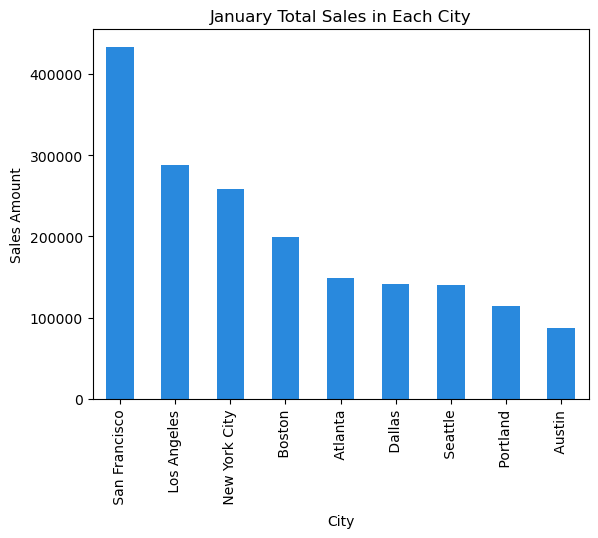

In [35]:
# Import matplotlib library

import matplotlib.pyplot as plt

jan_df.groupby('City')['Sales'].sum().sort_values(ascending = False).plot.bar(title = 'January Total Sales in Each City', color = '#2989dd')
print(jan_df.groupby('City')['Sales'].sum().sort_values(ascending = False))

plt.xlabel('City')
plt.ylabel('Sales Amount')
plt.show()

##### Which product leads the highest quantity of order?

Product
AAA Batteries (4-pack)        1595
AA Batteries (4-pack)         1423
USB-C Charging Cable          1280
Lightning Charging Cable      1147
Wired Headphones              1079
Apple Airpods Headphones       813
Bose SoundSport Headphones     659
27in FHD Monitor               419
iPhone                         379
Google Phone                   317
34in Ultrawide Monitor         314
27in 4K Gaming Monitor         312
Flatscreen TV                  243
Macbook Pro Laptop             234
ThinkPad Laptop                217
20in Monitor                   215
Vareebadd Phone                125
LG Washing Machine              42
LG Dryer                        39
Name: Quantity_Ordered, dtype: int64


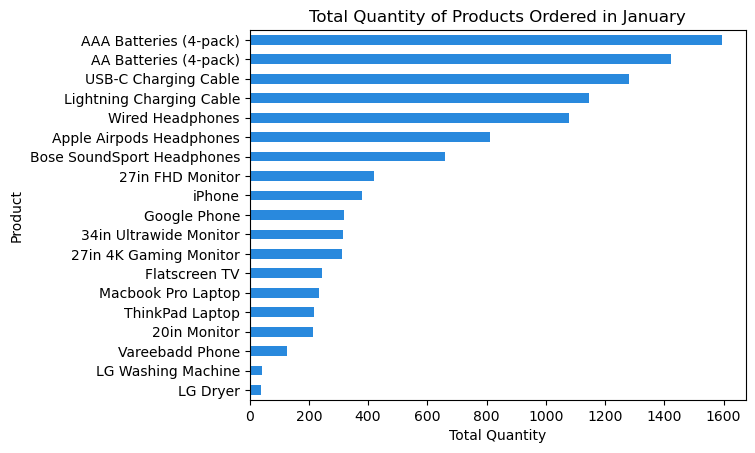

In [36]:
jan_df.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending = True).plot.barh(title = 'Total Quantity of Products Ordered in January', color = '#2989dd')
print(jan_df.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending = False))

plt.xlabel('Total Quantity')
plt.ylabel('Product')
plt.show()

##### Which day had the highest total sales?

Order_Date
2019-01-11    78402.59
2019-01-26    71476.18
2019-01-02    70663.20
2019-01-20    68084.88
2019-01-01    65681.94
2019-01-15    64869.32
2019-01-27    63683.97
2019-01-31    62383.13
2019-01-04    62000.22
2019-01-29    61692.21
2019-01-13    61284.39
2019-01-21    60336.30
2019-01-22    59380.92
2019-01-25    57721.49
2019-01-23    57572.45
2019-01-28    57419.48
2019-01-19    56964.73
2019-01-10    56660.92
2019-01-30    56238.61
2019-01-08    56100.52
2019-01-24    55848.86
2019-01-09    55153.13
2019-01-17    55148.91
2019-01-07    53676.42
2019-01-06    52762.54
2019-01-16    51305.00
2019-01-14    50078.53
2019-01-18    48469.74
2019-01-12    48111.46
2019-01-03    47046.20
2019-01-05    46524.63
Name: Sales, dtype: float64


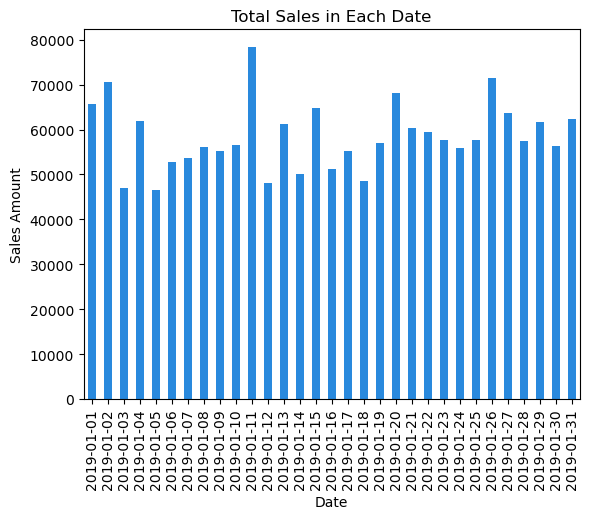

In [37]:
jan_df.groupby(jan_df.Order_Date.dt.date)['Sales'].sum().plot.bar(title = 'Total Sales in Each Date', color = '#2989dd')
print(jan_df.groupby(jan_df.Order_Date.dt.date)['Sales'].sum().sort_values(ascending = False))

plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

##### What time the products should be sold to increase the trend of customers purchasing the product?

Hour
12    741
19    733
11    727
18    720
20    702
10    692
13    687
21    632
16    625
15    613
Name: Quantity_Ordered, dtype: int64


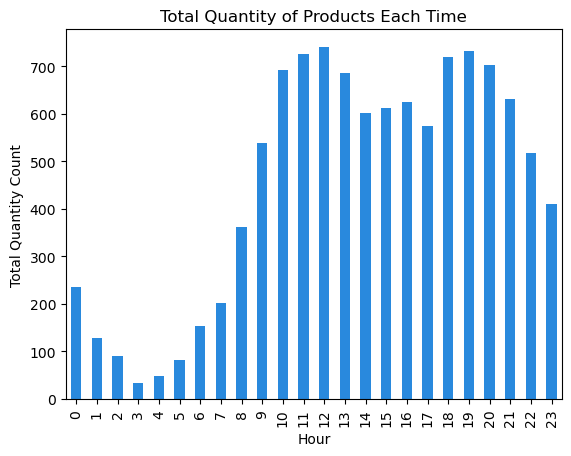

In [38]:
jan_df.groupby('Hour')['Quantity_Ordered'].sum().plot.bar(title = 'Total Quantity of Products Each Time', color = '#2989dd')
print(jan_df.groupby('Hour')['Quantity_Ordered'].sum().sort_values(ascending = False).head(10))

plt.xlabel('Hour')
plt.ylabel('Total Quantity Count')
plt.show()

#### February 2019 Sales

In [39]:
# Filter sales data in february

feb_df = all_months[(all_months['Order_Date'] >= '2019-02-01') & (all_months['Order_Date'] <= '2019-02-28')]

feb_df.head()

,Order_ID,Product,Price_Each,Quantity_Ordered,Sales,Order_Date,Hour,Minute,Address,City,State,Zipcode
0,150502,iPhone,700.00,1,700.00,2019-02-18,1,35,866 Spruce St,Portland,Maine,04101
1,150503,AA Batteries (4-pack),3.84,1,3.84,2019-02-13,7,24,18 13th St,San Francisco,California,94016
2,150504,27in 4K Gaming Monitor,389.99,1,389.99,2019-02-18,9,46,52 6th St,New York City,New York,10001
3,150505,Lightning Charging Cable,14.95,1,14.95,2019-02-02,16,47,129 Cherry St,Atlanta,Georgia,30301
4,150506,AA Batteries (4-pack),3.84,2,7.68,2019-02-28,20,32,548 Lincoln St,Seattle,Washington,98101


In [40]:
feb_df.describe()

,Order_ID,Price_Each,Quantity_Ordered,Sales,Hour,Minute
count,11957.000000,11957.000000,11957.000000,11957.000000,11957.000000,11957.000000
mean,156249.770678,182.900425,1.123275,183.999170,14.417663,29.631764
std,3326.700036,325.942825,0.431517,325.988793,5.427802,17.278880
min,145212.000000,2.990000,1.000000,2.990000,0.000000,0.000000
25%,153377.000000,11.950000,1.000000,11.950000,11.000000,15.000000
50%,156250.000000,14.950000,1.000000,14.950000,15.000000,30.000000
75%,159125.000000,150.000000,1.000000,150.000000,19.000000,45.000000
max,162008.000000,1700.000000,7.000000,1700.000000,23.000000,59.000000


##### Which city has the highest total sales?

City
San Francisco    546891.60
Los Angeles      341958.68
New York City    305372.26
Boston           213612.59
Dallas           186656.00
Atlanta          176458.31
Seattle          171330.25
Portland         149439.87
Austin           108358.52
Name: Sales, dtype: float64


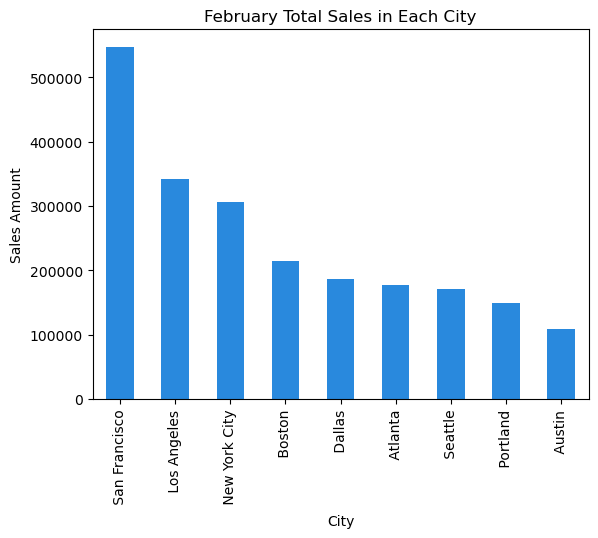

In [41]:
feb_df.groupby('City')['Sales'].sum().sort_values(ascending = False).plot.bar(title = 'February Total Sales in Each City', color = '#2989dd')
print(feb_df.groupby('City')['Sales'].sum().sort_values(ascending = False))

plt.xlabel('City')
plt.ylabel('Sales Amount')
plt.show()

##### Which product leads the highest quantity of order?

Product
AAA Batteries (4-pack)        1971
AA Batteries (4-pack)         1733
USB-C Charging Cable          1651
Lightning Charging Cable      1497
Wired Headphones              1275
Apple Airpods Headphones      1011
Bose SoundSport Headphones     839
27in FHD Monitor               475
iPhone                         438
27in 4K Gaming Monitor         426
34in Ultrawide Monitor         417
Google Phone                   381
Flatscreen TV                  313
Macbook Pro Laptop             276
ThinkPad Laptop                275
20in Monitor                   246
Vareebadd Phone                129
LG Washing Machine              40
LG Dryer                        38
Name: Quantity_Ordered, dtype: int64


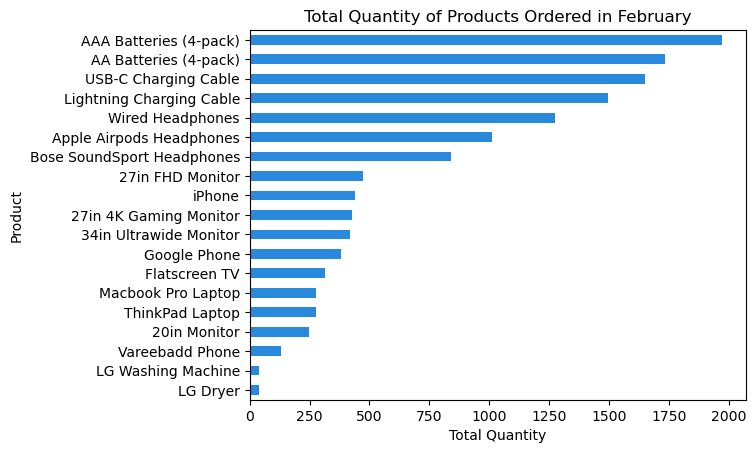

In [42]:
feb_df.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending = True).plot.barh(title = 'Total Quantity of Products Ordered in February', color = '#2989dd')
print(feb_df.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending = False))

plt.xlabel('Total Quantity')
plt.ylabel('Product')
plt.show()

##### Which day had the highest total sales?

Order_Date
2019-02-08    94507.13
2019-02-13    92554.31
2019-02-27    90377.62
2019-02-16    87786.35
2019-02-09    87767.13
2019-02-06    86252.05
2019-02-17    84481.74
2019-02-22    82520.99
2019-02-12    81058.52
2019-02-21    80969.31
2019-02-18    80262.53
2019-02-26    80006.81
2019-02-02    77893.74
2019-02-10    76772.52
2019-02-05    76124.54
2019-02-15    75581.65
2019-02-19    75543.15
2019-02-11    75116.02
2019-02-20    75050.82
2019-02-24    74934.91
2019-02-07    73616.68
2019-02-03    72971.05
2019-02-14    71620.69
2019-02-01    70972.40
2019-02-25    70949.21
2019-02-04    70260.00
2019-02-28    68200.41
2019-02-23    65925.80
Name: Sales, dtype: float64


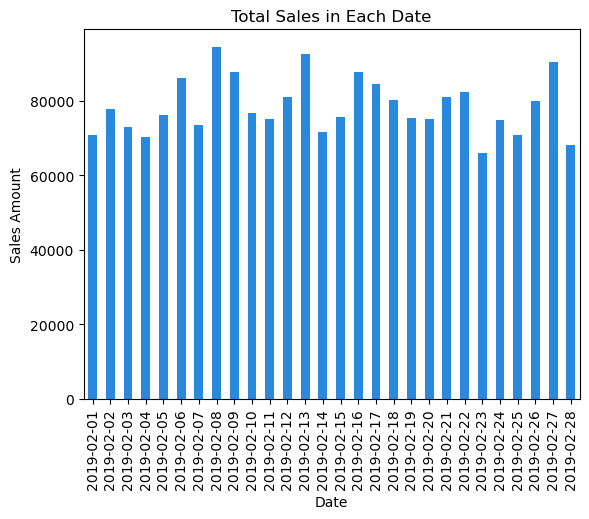

In [43]:
feb_df.groupby(feb_df.Order_Date.dt.date)['Sales'].sum().plot.bar(title = 'Total Sales in Each Date', color = '#2989dd')
print(feb_df.groupby(feb_df.Order_Date.dt.date)['Sales'].sum().sort_values(ascending = False))

plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

##### What time the products should be sold to increase the trend of customers purchasing the product?

Hour
19    911
18    901
13    875
12    873
20    868
17    841
21    834
11    834
10    825
16    772
Name: Quantity_Ordered, dtype: int64


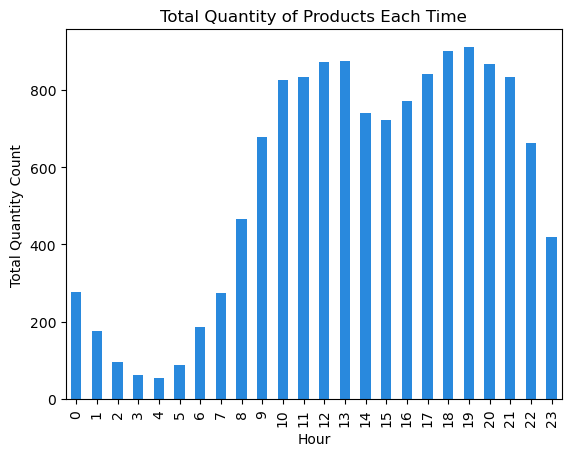

In [44]:
feb_df.groupby('Hour')['Quantity_Ordered'].sum().plot.bar(title = 'Total Quantity of Products Each Time', color = '#2989dd')
print(feb_df.groupby('Hour')['Quantity_Ordered'].sum().sort_values(ascending = False).head(10))

plt.xlabel('Hour')
plt.ylabel('Total Quantity Count')
plt.show()

#### March 2019 Sales

In [45]:
# Filter sales data in march

mar_df = all_months[(all_months['Order_Date'] >= '2019-03-01') & (all_months['Order_Date'] <= '2019-03-31')]

mar_df.head()

,Order_ID,Product,Price_Each,Quantity_Ordered,Sales,Order_Date,Hour,Minute,Address,City,State,Zipcode
32,150533,AAA Batteries (4-pack),2.99,1,2.99,2019-03-01,3,6,270 Dogwood St,San Francisco,California,94016
40,150541,AAA Batteries (4-pack),2.99,1,2.99,2019-03-01,1,3,683 Adams St,Portland,Oregon,97035
323,150812,Wired Headphones,11.99,1,11.99,2019-03-01,2,18,915 Maple St,San Francisco,California,94016
1306,151749,Bose SoundSport Headphones,99.99,1,99.99,2019-03-01,1,54,993 Washington St,San Francisco,California,94016
1609,152036,ThinkPad Laptop,999.99,1,999.99,2019-03-01,5,56,477 Washington St,San Francisco,California,94016


In [46]:
mar_df.describe()

,Order_ID,Price_Each,Quantity_Ordered,Sales,Hour,Minute
count,15128.000000,15128.000000,15128.000000,15128.000000,15128.000000,15128.000000
mean,169261.769236,184.365722,1.122356,185.416007,14.451481,29.533514
std,4227.145306,331.673576,0.441495,331.556813,5.379954,17.206539
min,150533.000000,2.990000,1.000000,2.990000,0.000000,0.000000
25%,165618.000000,11.950000,1.000000,11.950000,11.000000,15.000000
50%,169275.500000,14.950000,1.000000,14.950000,15.000000,29.000000
75%,172912.000000,150.000000,1.000000,150.000000,19.000000,44.000000
max,176557.000000,1700.000000,7.000000,1700.000000,23.000000,59.000000


##### Which city has the highest total sales?

City
San Francisco    693102.14
Los Angeles      429613.58
New York City    367226.31
Boston           301023.81
Atlanta          231605.38
Dallas           222373.69
Seattle          218688.82
Portland         186948.03
Austin           154391.59
Name: Sales, dtype: float64


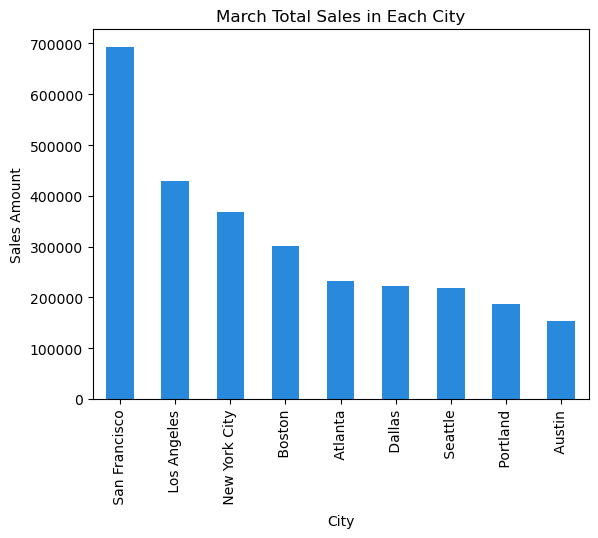

In [47]:
mar_df.groupby('City')['Sales'].sum().sort_values(ascending = False).plot.bar(title = 'March Total Sales in Each City', color = '#2989dd')
print(mar_df.groupby('City')['Sales'].sum().sort_values(ascending = False))

plt.xlabel('City')
plt.ylabel('Sales Amount')
plt.show()

##### Which product leads the highest quantity of order?

Product
AAA Batteries (4-pack)        2477
AA Batteries (4-pack)         2213
USB-C Charging Cable          1940
Lightning Charging Cable      1869
Wired Headphones              1663
Apple Airpods Headphones      1317
Bose SoundSport Headphones    1195
27in FHD Monitor               607
iPhone                         538
34in Ultrawide Monitor         521
27in 4K Gaming Monitor         479
Google Phone                   463
Macbook Pro Laptop             379
Flatscreen TV                  361
ThinkPad Laptop                345
20in Monitor                   325
Vareebadd Phone                174
LG Washing Machine              64
LG Dryer                        49
Name: Quantity_Ordered, dtype: int64


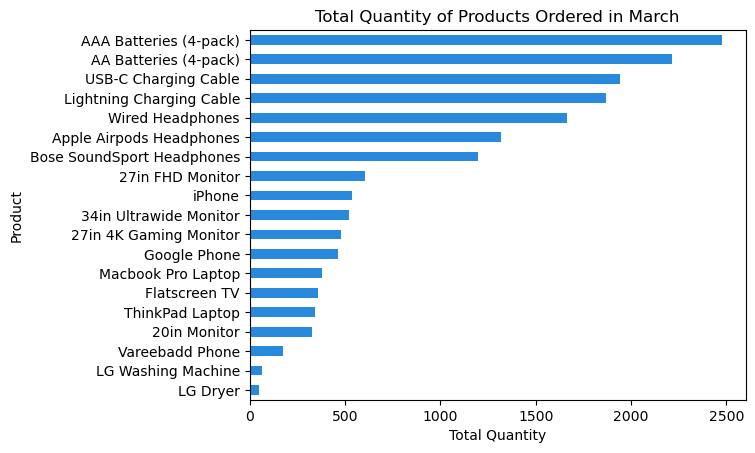

In [48]:
mar_df.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending = True).plot.barh(title = 'Total Quantity of Products Ordered in March', color = '#2989dd')
print(mar_df.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending = False))

plt.xlabel('Total Quantity')
plt.ylabel('Product')
plt.show()

##### Which day had the highest total sales?

Order_Date
2019-03-22    102892.12
2019-03-25    101651.05
2019-03-18    100966.63
2019-03-05    100209.44
2019-03-26     98903.16
2019-03-29     96918.07
2019-03-07     95649.80
2019-03-30     95571.96
2019-03-27     94807.26
2019-03-09     94633.42
2019-03-02     92309.70
2019-03-28     92156.67
2019-03-08     91815.88
2019-03-01     90943.91
2019-03-31     90864.79
2019-03-12     90338.99
2019-03-23     89955.77
2019-03-11     88639.24
2019-03-04     88485.21
2019-03-13     88085.73
2019-03-06     86296.07
2019-03-20     86259.98
2019-03-03     85518.78
2019-03-21     85303.08
2019-03-19     84953.11
2019-03-15     84464.50
2019-03-10     83406.56
2019-03-14     82178.02
2019-03-17     81118.83
2019-03-16     80945.76
2019-03-24     78729.86
Name: Sales, dtype: float64


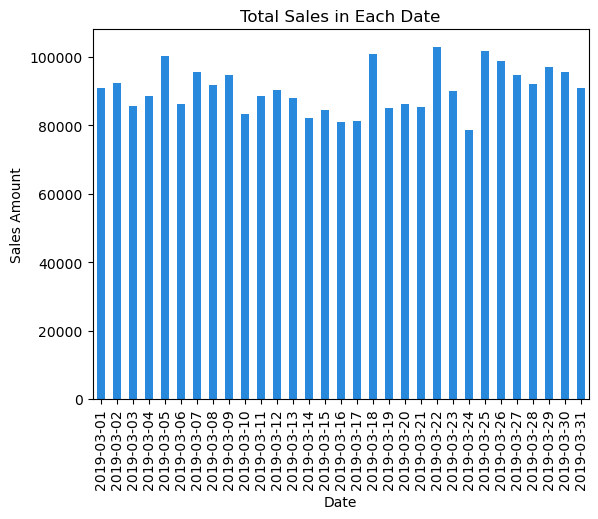

In [49]:
mar_df.groupby(mar_df.Order_Date.dt.date)['Sales'].sum().plot.bar(title = 'Total Sales in Each Date', color = '#2989dd')
print(mar_df.groupby(mar_df.Order_Date.dt.date)['Sales'].sum().sort_values(ascending = False))

plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

##### What time the products should be sold to increase the trend of customers purchasing the product?

Hour
19    1233
11    1193
18    1172
13    1166
12    1121
20    1102
14    1003
21     986
16     967
10     962
Name: Quantity_Ordered, dtype: int64


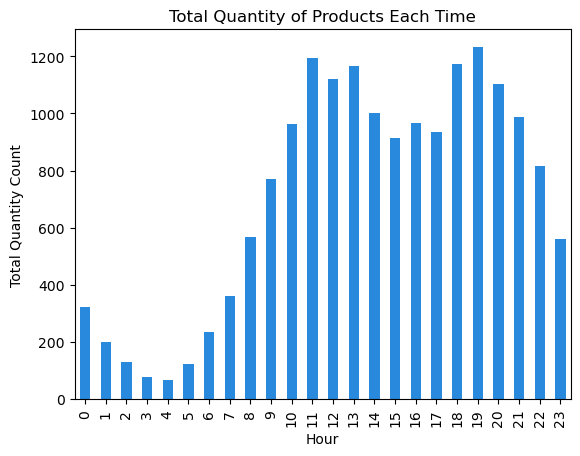

In [50]:
mar_df.groupby('Hour')['Quantity_Ordered'].sum().plot.bar(title = 'Total Quantity of Products Each Time', color = '#2989dd')
print(mar_df.groupby('Hour')['Quantity_Ordered'].sum().sort_values(ascending = False).head(10))

plt.xlabel('Hour')
plt.ylabel('Total Quantity Count')
plt.show()

#### April 2019 Sales

In [51]:
# Filter sales data in april

apr_df = all_months[(all_months['Order_Date'] >= '2019-04-01') & (all_months['Order_Date'] <= '2019-04-30')]

apr_df.head()

,Order_ID,Product,Price_Each,Quantity_Ordered,Sales,Order_Date,Hour,Minute,Address,City,State,Zipcode
0,176558,USB-C Charging Cable,11.95,2,23.90,2019-04-19,8,46,917 1st St,Dallas,Texas,75001
2,176559,Bose SoundSport Headphones,99.99,1,99.99,2019-04-07,22,30,682 Chestnut St,Boston,Massachusetts,02215
3,176560,Google Phone,600.00,1,600.00,2019-04-12,14,38,669 Spruce St,Los Angeles,California,90001
4,176560,Wired Headphones,11.99,1,11.99,2019-04-12,14,38,669 Spruce St,Los Angeles,California,90001
5,176561,Wired Headphones,11.99,1,11.99,2019-04-30,9,27,333 8th St,Los Angeles,California,90001


In [52]:
apr_df.describe()

,Order_ID,Price_Each,Quantity_Ordered,Sales,Hour,Minute
count,18257.000000,18257.000000,18257.000000,18257.000000,18257.000000,18257.000000
mean,185315.175768,184.379622,1.124829,185.639370,14.346059,29.775483
std,5087.063664,330.826474,0.436761,332.141314,5.421839,17.475554
min,162358.000000,2.990000,1.000000,2.990000,0.000000,0.000000
25%,180941.000000,11.950000,1.000000,11.950000,11.000000,15.000000
50%,185326.000000,14.950000,1.000000,14.950000,15.000000,30.000000
75%,189701.000000,150.000000,1.000000,150.000000,19.000000,45.000000
max,194094.000000,1700.000000,7.000000,3400.000000,23.000000,59.000000


##### Which city has the highest total sales?

City
San Francisco    812387.30
Los Angeles      550080.29
New York City    449314.88
Boston           353392.17
Atlanta          284422.01
Seattle          275724.08
Dallas           251235.54
Portland         239978.12
Austin           172683.59
Name: Sales, dtype: float64


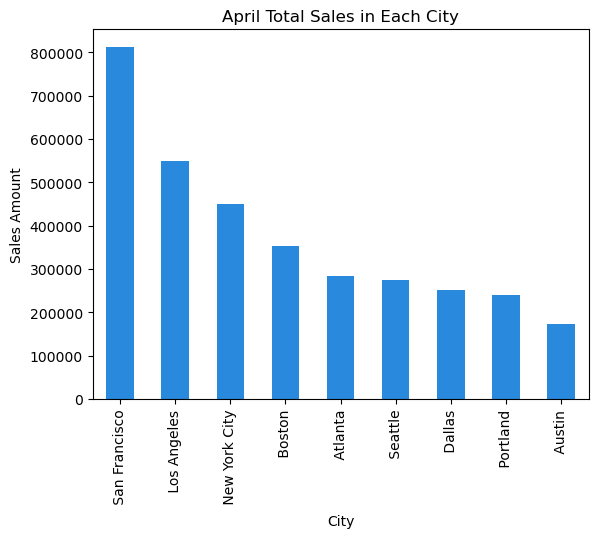

In [53]:
apr_df.groupby('City')['Sales'].sum().sort_values(ascending = False).plot.bar(title = 'April Total Sales in Each City', color = '#2989dd')
print(apr_df.groupby('City')['Sales'].sum().sort_values(ascending = False))

plt.xlabel('City')
plt.ylabel('Sales Amount')
plt.show()

##### Which product leads the highest quantity of order?

Product
AAA Batteries (4-pack)        2936
AA Batteries (4-pack)         2820
Lightning Charging Cable      2367
USB-C Charging Cable          2265
Wired Headphones              2064
Apple Airpods Headphones      1517
Bose SoundSport Headphones    1285
27in FHD Monitor               736
iPhone                         693
34in Ultrawide Monitor         653
Google Phone                   580
27in 4K Gaming Monitor         566
Flatscreen TV                  459
Macbook Pro Laptop             454
20in Monitor                   392
ThinkPad Laptop                390
Vareebadd Phone                220
LG Dryer                        78
LG Washing Machine              61
Name: Quantity_Ordered, dtype: int64


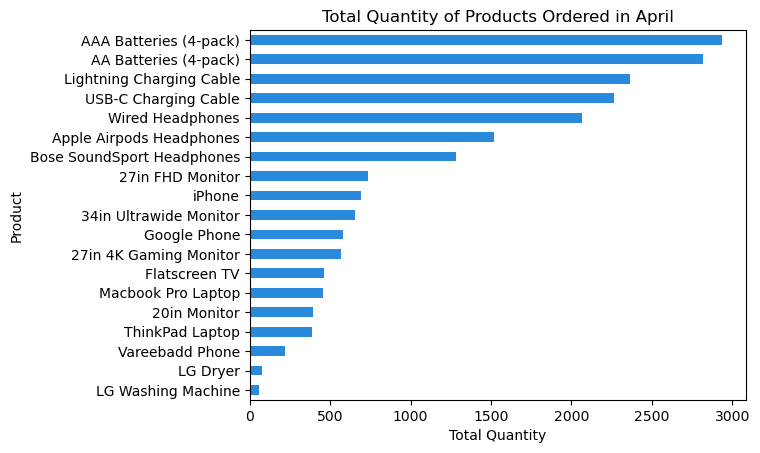

In [54]:
apr_df.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending = True).plot.barh(title = 'Total Quantity of Products Ordered in April', color = '#2989dd')
print(apr_df.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending = False))

plt.xlabel('Total Quantity')
plt.ylabel('Product')
plt.show()

##### Which day had the highest total sales?

Order_Date
2019-04-24    136162.37
2019-04-18    129391.77
2019-04-17    126333.25
2019-04-25    124453.24
2019-04-27    121977.73
2019-04-29    121735.63
2019-04-16    120845.91
2019-04-21    120653.93
2019-04-10    120346.58
2019-04-30    117543.03
2019-04-04    116203.04
2019-04-26    115389.09
2019-04-05    114012.88
2019-04-03    113611.75
2019-04-11    113048.28
2019-04-01    112697.76
2019-04-09    112259.31
2019-04-23    111792.56
2019-04-15    110239.21
2019-04-06    109928.87
2019-04-12    109263.75
2019-04-28    107744.71
2019-04-13    105919.82
2019-04-14    105730.53
2019-04-02    104496.71
2019-04-07    103541.96
2019-04-19    101059.56
2019-04-20     96773.82
2019-04-08     94885.95
2019-04-22     91174.98
Name: Sales, dtype: float64


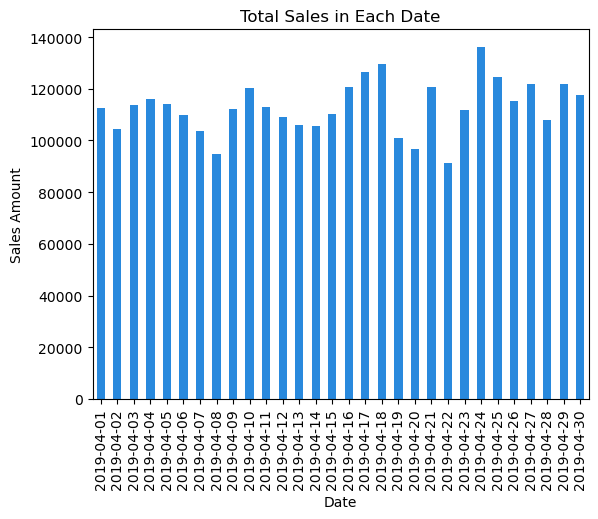

In [55]:
apr_df.groupby(apr_df.Order_Date.dt.date)['Sales'].sum().plot.bar(title = 'Total Sales in Each Date', color = '#2989dd')
print(apr_df.groupby(apr_df.Order_Date.dt.date)['Sales'].sum().sort_values(ascending = False))

plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

##### What time the products should be sold to increase the trend of customers purchasing the product?

Hour
19    1434
18    1382
11    1366
12    1339
13    1338
20    1320
10    1264
14    1257
16    1196
21    1160
Name: Quantity_Ordered, dtype: int64


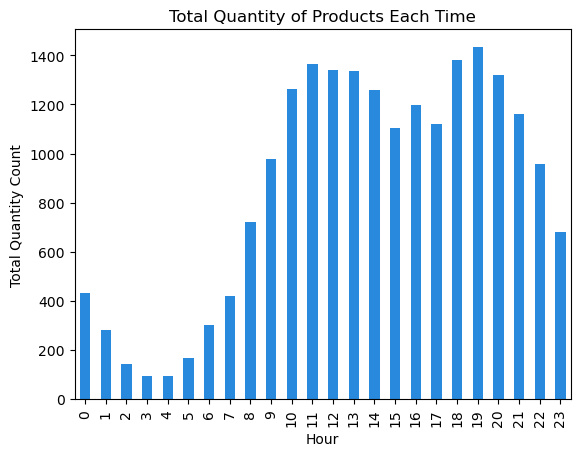

In [56]:
apr_df.groupby('Hour')['Quantity_Ordered'].sum().plot.bar(title = 'Total Quantity of Products Each Time', color = '#2989dd')
print(apr_df.groupby('Hour')['Quantity_Ordered'].sum().sort_values(ascending = False).head(10))

plt.xlabel('Hour')
plt.ylabel('Total Quantity Count')
plt.show()

#### May 2019 Sales

In [57]:
# Filter sales data in may

may_df = all_months[(all_months['Order_Date'] >= '2019-05-01') & (all_months['Order_Date'] <= '2019-05-31')]

may_df.head()

,Order_ID,Product,Price_Each,Quantity_Ordered,Sales,Order_Date,Hour,Minute,Address,City,State,Zipcode
439,176978,Apple Airpods Headphones,150.00,1,150.00,2019-05-01,3,29,589 Lake St,Portland,Oregon,97035
1044,177551,27in FHD Monitor,149.99,1,149.99,2019-05-01,0,13,615 Lincoln St,San Francisco,California,94016
1282,177778,iPhone,700.00,1,700.00,2019-05-01,0,48,478 West St,Boston,Massachusetts,02215
1283,177778,Apple Airpods Headphones,150.00,1,150.00,2019-05-01,0,48,478 West St,Boston,Massachusetts,02215
2629,179076,Google Phone,600.00,1,600.00,2019-05-01,0,17,635 Chestnut St,San Francisco,California,94016


In [58]:
may_df.describe()

,Order_ID,Price_Each,Quantity_Ordered,Sales,Hour,Minute
count,16552.000000,16552.000000,16552.000000,16552.000000,16552.000000,16552.000000
mean,201972.981573,189.290395,1.126933,190.346558,14.413968,29.457407
std,4628.979738,342.479088,0.448301,342.964978,5.417172,17.377167
min,176978.000000,2.990000,1.000000,2.990000,0.000000,0.000000
25%,198025.000000,11.950000,1.000000,11.950000,11.000000,14.750000
50%,201985.500000,14.950000,1.000000,14.950000,15.000000,29.000000
75%,205954.250000,150.000000,1.000000,150.000000,19.000000,45.000000
max,209920.000000,1700.000000,7.000000,3400.000000,23.000000,59.000000


##### Which city has the highest total sales?

City
San Francisco    774967.54
Los Angeles      499586.23
New York City    436120.42
Boston           328791.70
Dallas           268326.61
Atlanta          238842.00
Portland         231708.01
Seattle          211638.50
Austin           160635.22
Name: Sales, dtype: float64


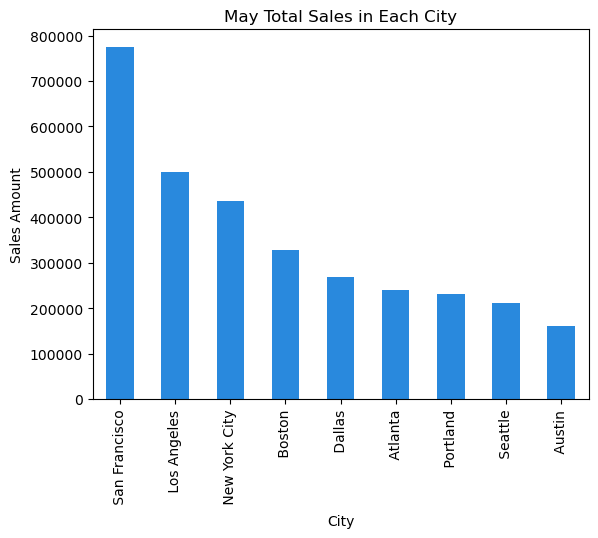

In [59]:
may_df.groupby('City')['Sales'].sum().sort_values(ascending = False).plot.bar(title = 'May Total Sales in Each City', color = '#2989dd')
print(may_df.groupby('City')['Sales'].sum().sort_values(ascending = False))

plt.xlabel('City')
plt.ylabel('Sales Amount')
plt.show()

##### Which product leads the highest quantity of order?

Product
AAA Batteries (4-pack)        2923
AA Batteries (4-pack)         2383
Lightning Charging Cable      2074
USB-C Charging Cable          2064
Wired Headphones              1875
Apple Airpods Headphones      1365
Bose SoundSport Headphones    1174
27in FHD Monitor               689
iPhone                         640
34in Ultrawide Monitor         544
27in 4K Gaming Monitor         542
Google Phone                   480
Macbook Pro Laptop             464
Flatscreen TV                  399
ThinkPad Laptop                371
20in Monitor                   341
Vareebadd Phone                185
LG Dryer                        76
LG Washing Machine              64
Name: Quantity_Ordered, dtype: int64


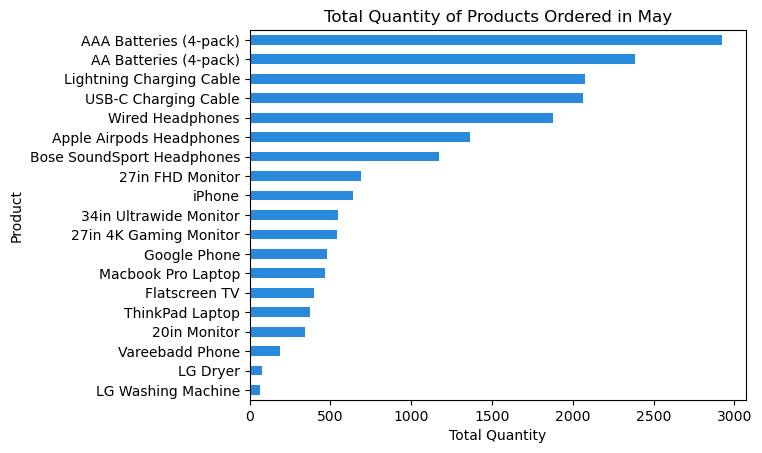

In [60]:
may_df.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending = True).plot.barh(title = 'Total Quantity of Products Ordered in May', color = '#2989dd')
print(may_df.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending = False))

plt.xlabel('Total Quantity')
plt.ylabel('Product')
plt.show()

##### Which day had the highest total sales?

Order_Date
2019-05-26    113490.20
2019-05-22    112042.05
2019-05-05    109929.27
2019-05-09    109356.06
2019-05-11    108997.90
2019-05-19    108252.43
2019-05-08    107950.47
2019-05-01    107690.74
2019-05-10    106879.76
2019-05-03    105895.00
2019-05-17    105365.07
2019-05-12    105095.31
2019-05-28    104614.89
2019-05-04    104348.54
2019-05-14    103800.64
2019-05-29    103177.54
2019-05-30    102985.14
2019-05-20    100939.51
2019-05-24    100616.18
2019-05-21     99856.81
2019-05-18     98955.28
2019-05-16     97813.96
2019-05-02     97320.41
2019-05-06     96172.39
2019-05-27     95637.76
2019-05-23     95498.61
2019-05-07     94858.10
2019-05-15     91007.38
2019-05-13     90437.12
2019-05-25     87341.19
2019-05-31     84290.52
Name: Sales, dtype: float64


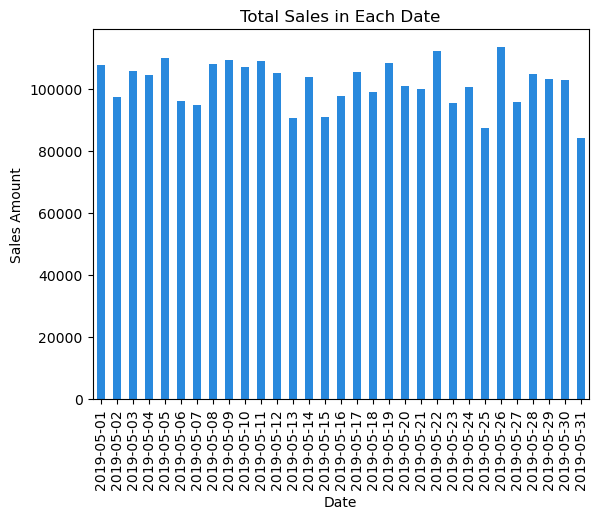

In [61]:
may_df.groupby(may_df.Order_Date.dt.date)['Sales'].sum().plot.bar(title = 'Total Sales in Each Date', color = '#2989dd')
print(may_df.groupby(may_df.Order_Date.dt.date)['Sales'].sum().sort_values(ascending = False))

plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

##### What time the products should be sold to increase the trend of customers purchasing the product?

Hour
12    1350
19    1313
20    1302
18    1233
11    1195
13    1195
14    1142
17    1119
10    1107
21    1069
Name: Quantity_Ordered, dtype: int64


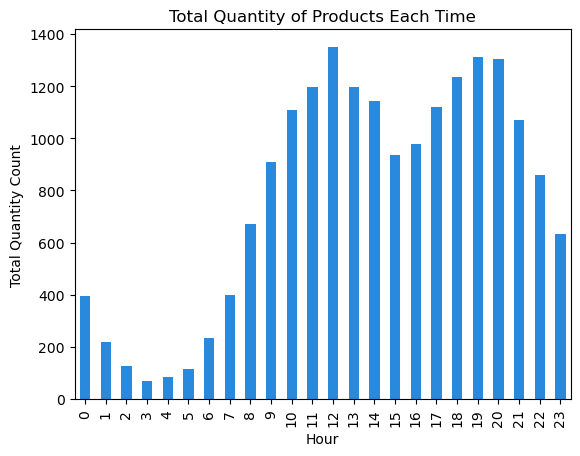

In [62]:
may_df.groupby('Hour')['Quantity_Ordered'].sum().plot.bar(title = 'Total Quantity of Products Each Time', color = '#2989dd')
print(may_df.groupby('Hour')['Quantity_Ordered'].sum().sort_values(ascending = False).head(10))

plt.xlabel('Hour')
plt.ylabel('Total Quantity Count')
plt.show()

#### June 2019 Sales

In [63]:
# Filter sales data in june

jun_df = all_months[(all_months['Order_Date'] >= '2019-06-01') & (all_months['Order_Date'] <= '2019-06-30')]

jun_df.head()

,Order_ID,Product,Price_Each,Quantity_Ordered,Sales,Order_Date,Hour,Minute,Address,City,State,Zipcode
0,209921,USB-C Charging Cable,11.95,1,11.95,2019-06-23,19,34,950 Walnut St,Portland,Maine,04101
1,209922,Macbook Pro Laptop,1700.00,1,1700.00,2019-06-30,10,5,80 4th St,San Francisco,California,94016
2,209923,ThinkPad Laptop,999.99,1,999.99,2019-06-24,20,18,402 Jackson St,Los Angeles,California,90001
3,209924,27in FHD Monitor,149.99,1,149.99,2019-06-05,10,21,560 10th St,Seattle,Washington,98101
4,209925,Bose SoundSport Headphones,99.99,1,99.99,2019-06-25,18,58,545 2nd St,San Francisco,California,94016


In [64]:
jun_df.describe()

,Order_ID,Price_Each,Quantity_Ordered,Sales,Hour,Minute
count,13535.000000,13535.000000,13535.000000,13535.000000,13535.000000,13535.000000
mean,216392.180199,189.176468,1.125526,190.342087,14.423569,29.688881
std,3795.110857,337.003138,0.429939,337.582608,5.421762,17.304868
min,195748.000000,2.990000,1.000000,2.990000,0.000000,0.000000
25%,213149.500000,11.950000,1.000000,11.950000,11.000000,15.000000
50%,216398.000000,14.950000,1.000000,14.950000,15.000000,30.000000
75%,219651.500000,150.000000,1.000000,150.000000,19.000000,45.000000
max,222909.000000,1700.000000,9.000000,3400.000000,23.000000,59.000000


##### Which city has the highest total sales?

City
San Francisco    612373.49
Los Angeles      451524.25
New York City    323886.60
Boston           254461.17
Atlanta          219801.52
Seattle          213841.57
Dallas           186873.80
Portland         169460.46
Austin           144057.29
Name: Sales, dtype: float64


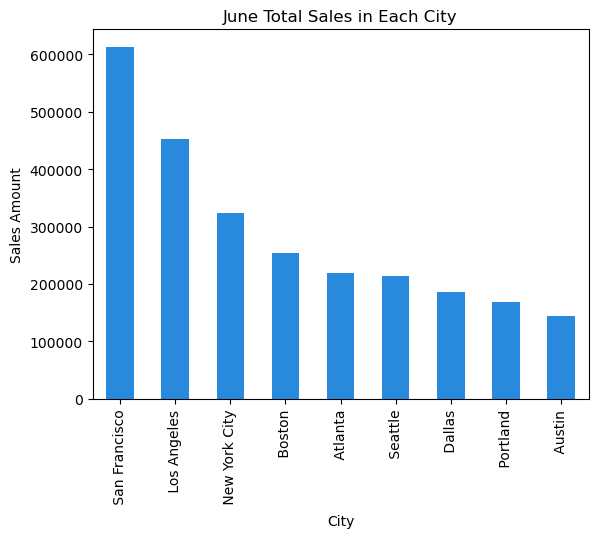

In [65]:
jun_df.groupby('City')['Sales'].sum().sort_values(ascending = False).plot.bar(title = 'June Total Sales in Each City', color = '#2989dd')
print(jun_df.groupby('City')['Sales'].sum().sort_values(ascending = False))

plt.xlabel('City')
plt.ylabel('Sales Amount')
plt.show()

##### Which product leads the highest quantity of order?

Product
AAA Batteries (4-pack)        2161
AA Batteries (4-pack)         2093
Lightning Charging Cable      1683
USB-C Charging Cable          1672
Wired Headphones              1473
Apple Airpods Headphones      1165
Bose SoundSport Headphones     979
27in FHD Monitor               567
iPhone                         532
34in Ultrawide Monitor         455
27in 4K Gaming Monitor         451
Google Phone                   391
Flatscreen TV                  367
Macbook Pro Laptop             356
20in Monitor                   322
ThinkPad Laptop                314
Vareebadd Phone                155
LG Washing Machine              55
LG Dryer                        43
Name: Quantity_Ordered, dtype: int64


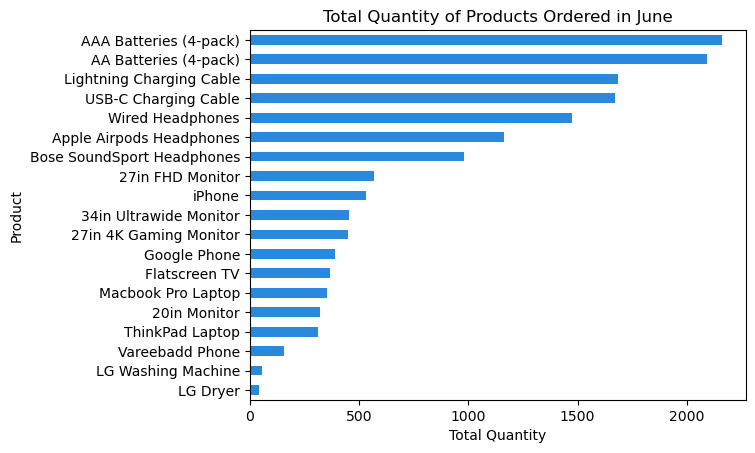

In [66]:
jun_df.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending = True).plot.barh(title = 'Total Quantity of Products Ordered in June', color = '#2989dd')
print(jun_df.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending = False))

plt.xlabel('Total Quantity')
plt.ylabel('Product')
plt.show()

##### Which day had the highest total sales?

Order_Date
2019-06-09    99484.39
2019-06-28    99253.33
2019-06-18    98105.83
2019-06-25    94449.32
2019-06-19    94337.88
2019-06-29    93761.56
2019-06-11    92912.52
2019-06-14    92760.07
2019-06-08    91870.30
2019-06-15    91063.60
2019-06-01    90536.69
2019-06-23    89621.75
2019-06-20    88366.27
2019-06-05    88272.75
2019-06-06    87353.04
2019-06-02    86997.62
2019-06-04    86551.75
2019-06-12    85872.03
2019-06-21    85703.94
2019-06-03    85261.91
2019-06-30    83736.27
2019-06-13    82611.19
2019-06-17    81010.21
2019-06-07    77574.34
2019-06-16    76546.50
2019-06-22    74463.62
2019-06-10    72277.92
2019-06-27    71480.38
2019-06-26    68766.31
2019-06-24    65276.86
Name: Sales, dtype: float64


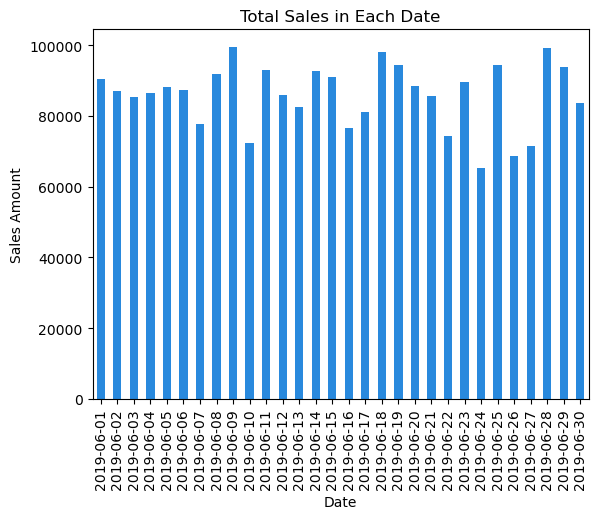

In [67]:
jun_df.groupby(jun_df.Order_Date.dt.date)['Sales'].sum().plot.bar(title = 'Total Sales in Each Date', color = '#2989dd')
print(jun_df.groupby(jun_df.Order_Date.dt.date)['Sales'].sum().sort_values(ascending = False))

plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

##### What time the products should be sold to increase the trend of customers purchasing the product?

Hour
18    1046
11    1046
12    1010
20     998
19     996
13     992
21     911
10     900
17     890
15     879
Name: Quantity_Ordered, dtype: int64


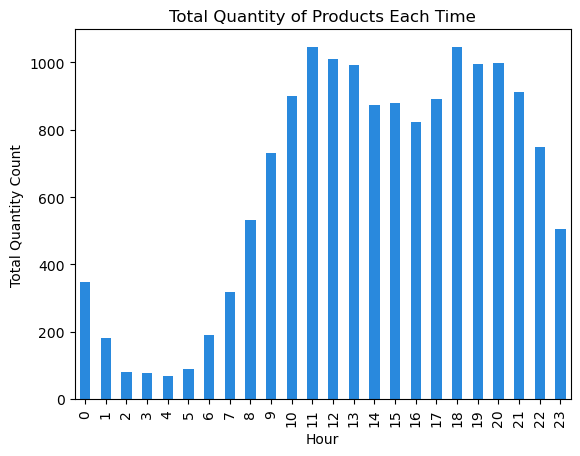

In [68]:
jun_df.groupby('Hour')['Quantity_Ordered'].sum().plot.bar(title = 'Total Quantity of Products Each Time', color = '#2989dd')
print(jun_df.groupby('Hour')['Quantity_Ordered'].sum().sort_values(ascending = False).head(10))

plt.xlabel('Hour')
plt.ylabel('Total Quantity Count')
plt.show()

#### July 2019 Sales

In [69]:
# Filter sales data in july

jul_df = all_months[(all_months['Order_Date'] >= '2019-07-01') & (all_months['Order_Date'] <= '2019-07-31')]

jul_df.head()

,Order_ID,Product,Price_Each,Quantity_Ordered,Sales,Order_Date,Hour,Minute,Address,City,State,Zipcode
0,222910,Apple Airpods Headphones,150.00,1,150.00,2019-07-26,16,51,389 South St,Atlanta,Georgia,30301
1,222911,Flatscreen TV,300.00,1,300.00,2019-07-05,8,55,590 4th St,Seattle,Washington,98101
2,222912,AA Batteries (4-pack),3.84,1,3.84,2019-07-29,12,41,861 Hill St,Atlanta,Georgia,30301
3,222913,AA Batteries (4-pack),3.84,1,3.84,2019-07-28,10,15,190 Ridge St,Atlanta,Georgia,30301
4,222914,AAA Batteries (4-pack),2.99,5,14.95,2019-07-31,2,13,824 Forest St,Seattle,Washington,98101


In [70]:
jul_df.describe()

,Order_ID,Price_Each,Quantity_Ordered,Sales,Hour,Minute
count,14275.000000,14275.000000,14275.000000,14275.000000,14275.000000,14275.000000
mean,229773.081891,184.324001,1.124623,185.391336,14.424448,29.204623
std,3998.605484,333.128746,0.461134,333.024103,5.435067,17.262273
min,211665.000000,2.990000,1.000000,2.990000,0.000000,0.000000
25%,226331.500000,11.950000,1.000000,11.950000,11.000000,14.000000
50%,229777.000000,14.950000,1.000000,14.950000,15.000000,29.000000
75%,233228.000000,150.000000,1.000000,150.000000,19.000000,44.000000
max,236669.000000,1700.000000,9.000000,1700.000000,23.000000,59.000000


##### Which city has the highest total sales?

City
San Francisco    641989.89
Los Angeles      394054.77
New York City    355698.16
Boston           291478.35
Seattle          212510.93
Dallas           212325.17
Atlanta          211663.49
Portland         176415.63
Austin           150324.93
Name: Sales, dtype: float64


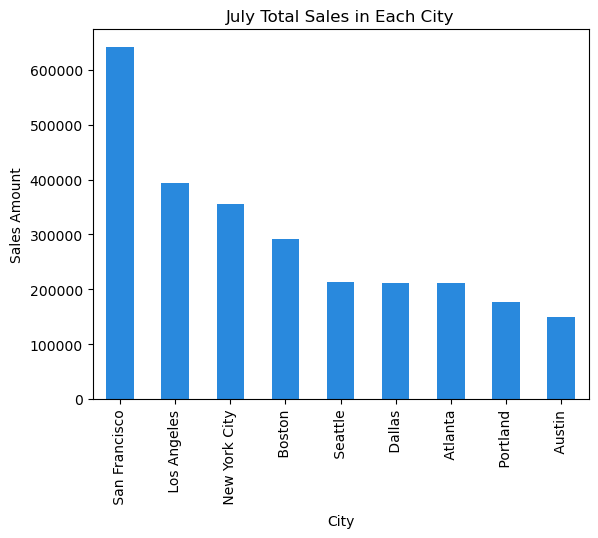

In [71]:
jul_df.groupby('City')['Sales'].sum().sort_values(ascending = False).plot.bar(title = 'July Total Sales in Each City', color = '#2989dd')
print(jul_df.groupby('City')['Sales'].sum().sort_values(ascending = False))

plt.xlabel('City')
plt.ylabel('Sales Amount')
plt.show()

##### Which product leads the highest quantity of order?

Product
AAA Batteries (4-pack)        2361
AA Batteries (4-pack)         2070
USB-C Charging Cable          1848
Lightning Charging Cable      1806
Wired Headphones              1564
Apple Airpods Headphones      1220
Bose SoundSport Headphones    1057
27in FHD Monitor               605
iPhone                         502
27in 4K Gaming Monitor         483
34in Ultrawide Monitor         462
Google Phone                   410
Flatscreen TV                  399
Macbook Pro Laptop             368
20in Monitor                   327
ThinkPad Laptop                319
Vareebadd Phone                146
LG Dryer                        55
LG Washing Machine              52
Name: Quantity_Ordered, dtype: int64


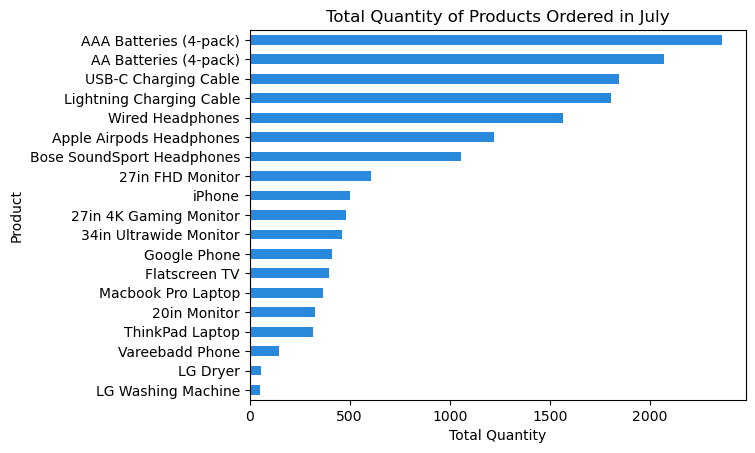

In [72]:
jul_df.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending = True).plot.barh(title = 'Total Quantity of Products Ordered in July', color = '#2989dd')
print(jul_df.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending = False))

plt.xlabel('Total Quantity')
plt.ylabel('Product')
plt.show()

##### Which day had the highest total sales?

Order_Date
2019-07-21    104283.77
2019-07-04    102134.73
2019-07-06     99353.78
2019-07-13     98082.88
2019-07-18     96303.29
2019-07-14     94690.12
2019-07-03     93628.00
2019-07-22     90392.25
2019-07-31     90352.23
2019-07-15     90226.15
2019-07-10     89913.89
2019-07-01     89500.91
2019-07-16     87830.83
2019-07-30     87488.84
2019-07-28     86404.43
2019-07-08     84443.83
2019-07-20     84184.39
2019-07-24     83754.00
2019-07-09     83604.82
2019-07-11     80921.09
2019-07-27     80624.03
2019-07-17     78741.93
2019-07-12     78323.96
2019-07-29     77803.50
2019-07-02     76008.26
2019-07-23     75213.24
2019-07-25     74060.14
2019-07-19     73736.12
2019-07-05     72282.71
2019-07-26     71835.06
2019-07-07     70338.14
Name: Sales, dtype: float64


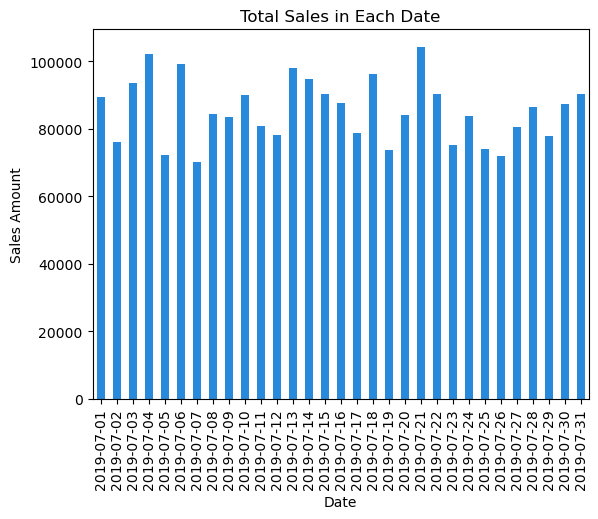

In [73]:
jul_df.groupby(jul_df.Order_Date.dt.date)['Sales'].sum().plot.bar(title = 'Total Sales in Each Date', color = '#2989dd')
print(jul_df.groupby(jul_df.Order_Date.dt.date)['Sales'].sum().sort_values(ascending = False))

plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

##### What time the products should be sold to increase the trend of customers purchasing the product?

Hour
11    1120
19    1092
12    1078
20    1073
17    1035
18    1017
13    1016
21     941
14     928
15     879
Name: Quantity_Ordered, dtype: int64


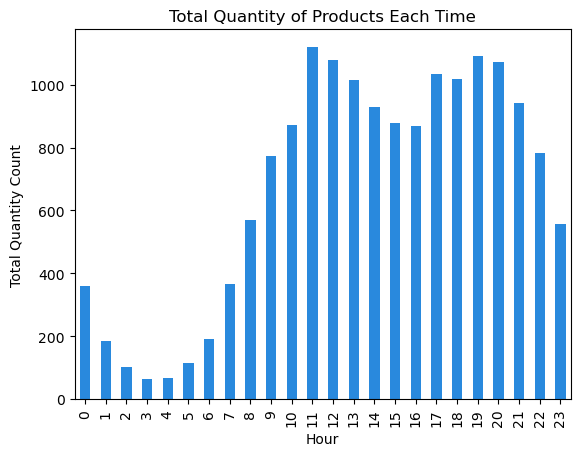

In [74]:
jul_df.groupby('Hour')['Quantity_Ordered'].sum().plot.bar(title = 'Total Quantity of Products Each Time', color = '#2989dd')
print(jul_df.groupby('Hour')['Quantity_Ordered'].sum().sort_values(ascending = False).head(10))

plt.xlabel('Hour')
plt.ylabel('Total Quantity Count')
plt.show()

#### August 2019 Sales

In [75]:
# Filter sales data in august

aug_df = all_months[(all_months['Order_Date'] >= '2019-08-01') & (all_months['Order_Date'] <= '2019-08-31')]

aug_df.head()

,Order_ID,Product,Price_Each,Quantity_Ordered,Sales,Order_Date,Hour,Minute,Address,City,State,Zipcode
0,236670,Wired Headphones,11.99,2,23.98,2019-08-31,22,21,359 Spruce St,Seattle,Washington,98101
1,236671,Bose SoundSport Headphones,99.99,1,99.99,2019-08-15,15,11,492 Ridge St,Dallas,Texas,75001
2,236672,iPhone,700.00,1,700.00,2019-08-06,14,40,149 7th St,Portland,Oregon,97035
3,236673,AA Batteries (4-pack),3.84,2,7.68,2019-08-29,20,59,631 2nd St,Los Angeles,California,90001
4,236674,AA Batteries (4-pack),3.84,2,7.68,2019-08-15,19,53,736 14th St,New York City,New York,10001


In [76]:
aug_df.describe()

,Order_ID,Price_Each,Quantity_Ordered,Sales,Hour,Minute
count,11943.000000,11943.000000,11943.000000,11943.000000,11943.000000,11943.000000
mean,242399.768232,186.466039,1.124424,187.648277,14.405844,29.577661
std,3346.936431,332.141350,0.449893,332.193945,5.435573,17.312374
min,223710.000000,2.990000,1.000000,2.990000,0.000000,0.000000
25%,239536.500000,11.950000,1.000000,11.950000,11.000000,15.000000
50%,242414.000000,14.950000,1.000000,14.950000,15.000000,30.000000
75%,245272.500000,150.000000,1.000000,150.000000,19.000000,45.000000
max,248150.000000,1700.000000,8.000000,1700.000000,23.000000,59.000000


##### Which city has the highest total sales?

City
San Francisco    538715.31
Los Angeles      344163.58
New York City    302401.53
Boston           239260.31
Seattle          189335.10
Dallas           179663.47
Atlanta          169267.66
Portland         152712.79
Austin           125563.62
Name: Sales, dtype: float64


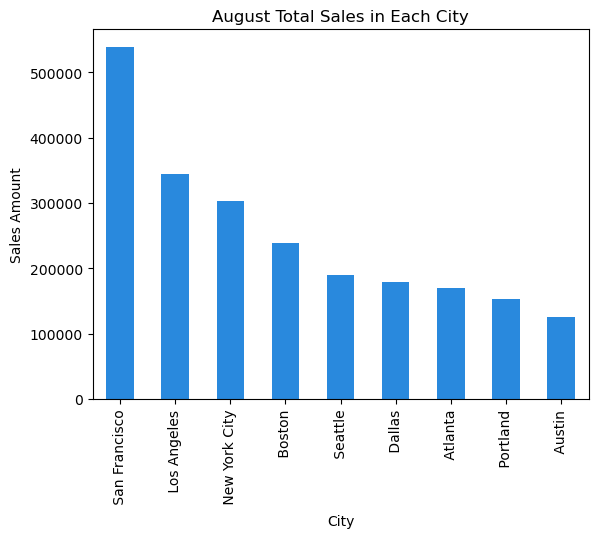

In [77]:
aug_df.groupby('City')['Sales'].sum().sort_values(ascending = False).plot.bar(title = 'August Total Sales in Each City', color = '#2989dd')
print(aug_df.groupby('City')['Sales'].sum().sort_values(ascending = False))

plt.xlabel('City')
plt.ylabel('Sales Amount')
plt.show()

##### Which product leads the highest quantity of order?

Product
AAA Batteries (4-pack)        2019
AA Batteries (4-pack)         1828
USB-C Charging Cable          1457
Lightning Charging Cable      1440
Wired Headphones              1289
Apple Airpods Headphones      1008
Bose SoundSport Headphones     880
27in FHD Monitor               490
iPhone                         439
27in 4K Gaming Monitor         439
34in Ultrawide Monitor         378
Google Phone                   361
Flatscreen TV                  331
Macbook Pro Laptop             298
ThinkPad Laptop                274
20in Monitor                   261
Vareebadd Phone                143
LG Washing Machine              48
LG Dryer                        46
Name: Quantity_Ordered, dtype: int64


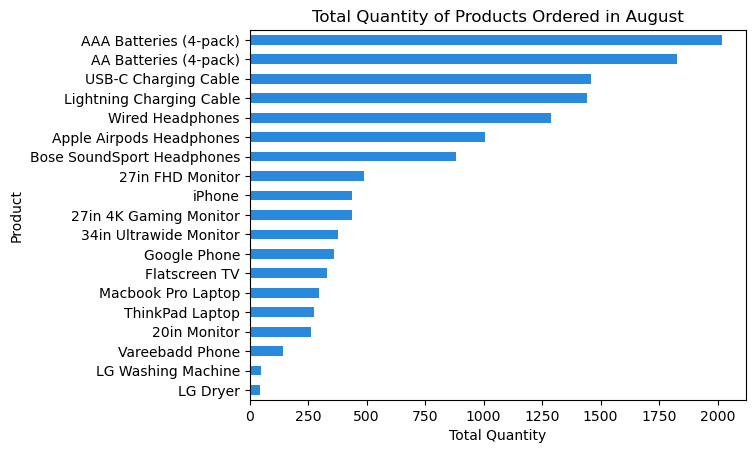

In [78]:
aug_df.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending = True).plot.barh(title = 'Total Quantity of Products Ordered in August', color = '#2989dd')
print(aug_df.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending = False))

plt.xlabel('Total Quantity')
plt.ylabel('Product')
plt.show()

##### Which day had the highest total sales?

Order_Date
2019-08-10    95148.68
2019-08-14    83965.86
2019-08-06    83368.39
2019-08-22    81466.55
2019-08-25    80612.89
2019-08-09    78473.51
2019-08-11    77852.09
2019-08-05    76464.89
2019-08-03    76004.41
2019-08-28    75274.80
2019-08-20    74967.59
2019-08-07    74483.67
2019-08-15    73802.24
2019-08-29    73247.52
2019-08-19    73121.10
2019-08-17    71913.68
2019-08-01    71788.45
2019-08-26    71715.26
2019-08-04    70642.64
2019-08-13    70020.41
2019-08-02    69120.53
2019-08-27    68615.65
2019-08-16    66786.54
2019-08-12    66524.75
2019-08-24    66452.51
2019-08-30    65785.16
2019-08-31    65183.83
2019-08-08    64769.08
2019-08-23    60535.27
2019-08-18    59915.00
2019-08-21    53060.42
Name: Sales, dtype: float64


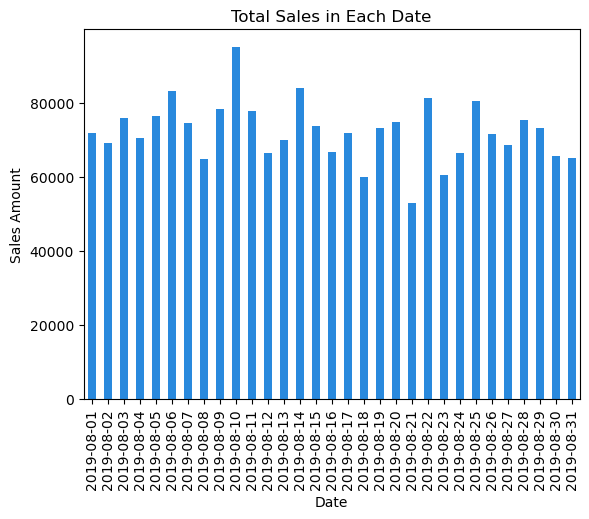

In [79]:
aug_df.groupby(aug_df.Order_Date.dt.date)['Sales'].sum().plot.bar(title = 'Total Sales in Each Date', color = '#2989dd')
print(aug_df.groupby(aug_df.Order_Date.dt.date)['Sales'].sum().sort_values(ascending = False))

plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

##### What time the products should be sold to increase the trend of customers purchasing the product?

Hour
20    939
19    917
12    896
11    893
13    872
18    846
15    810
14    801
10    773
17    757
Name: Quantity_Ordered, dtype: int64


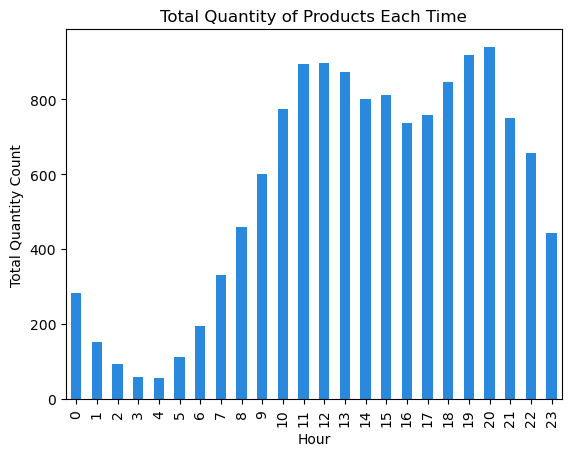

In [80]:
aug_df.groupby('Hour')['Quantity_Ordered'].sum().plot.bar(title = 'Total Quantity of Products Each Time', color = '#2989dd')
print(aug_df.groupby('Hour')['Quantity_Ordered'].sum().sort_values(ascending = False).head(10))

plt.xlabel('Hour')
plt.ylabel('Total Quantity Count')
plt.show()

#### September 2019 Sales

In [81]:
# Filter sales data in september

sep_df = all_months[(all_months['Order_Date'] >= '2019-09-01') & (all_months['Order_Date'] <= '2019-09-30')]

sep_df.head()

,Order_ID,Product,Price_Each,Quantity_Ordered,Sales,Order_Date,Hour,Minute,Address,City,State,Zipcode
2251,238834,Apple Airpods Headphones,150.00,1,150.00,2019-09-01,4,13,761 Forest St,San Francisco,California,94016
2731,239285,34in Ultrawide Monitor,379.99,1,379.99,2019-09-01,1,9,373 1st St,San Francisco,California,94016
4124,240636,Lightning Charging Cable,14.95,1,14.95,2019-09-01,2,7,63 1st St,Seattle,Washington,98101
4569,241054,AAA Batteries (4-pack),2.99,1,2.99,2019-09-01,0,25,175 South St,San Francisco,California,94016
5914,242343,ThinkPad Laptop,999.99,1,999.99,2019-09-01,2,44,510 Park St,Boston,Massachusetts,02215


In [82]:
sep_df.describe()

,Order_ID,Price_Each,Quantity_Ordered,Sales,Hour,Minute
count,11603.000000,11603.000000,11603.000000,11603.000000,11603.000000,11603.000000
mean,253739.920969,179.427532,1.128243,180.510703,14.496768,29.401965
std,3252.187117,328.532810,0.435177,328.478786,5.468269,17.391903
min,238834.000000,2.990000,1.000000,2.990000,0.000000,0.000000
25%,250938.500000,11.950000,1.000000,11.950000,11.000000,14.000000
50%,253743.000000,14.950000,1.000000,14.950000,15.000000,30.000000
75%,256547.500000,150.000000,1.000000,150.000000,19.000000,45.000000
max,259357.000000,1700.000000,6.000000,1700.000000,23.000000,59.000000


##### Which city has the highest total sales?

City
San Francisco    462870.03
Los Angeles      354075.69
New York City    300401.88
Boston           248231.83
Atlanta          171263.94
Dallas           162362.86
Seattle          156369.27
Portland         132556.49
Austin           106333.70
Name: Sales, dtype: float64


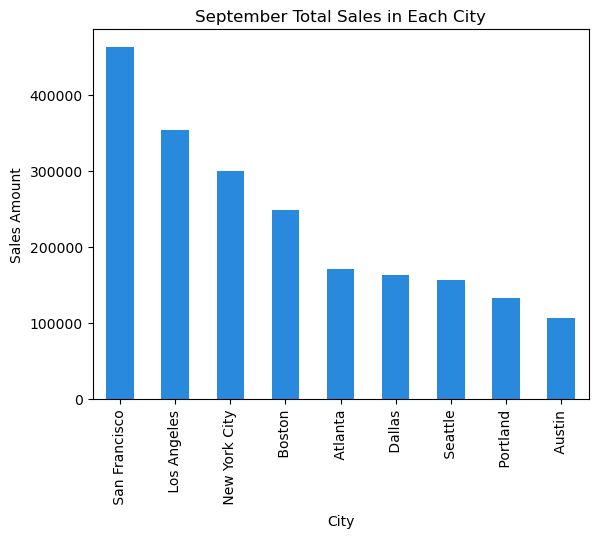

In [83]:
sep_df.groupby('City')['Sales'].sum().sort_values(ascending = False).plot.bar(title = 'September Total Sales in Each City', color = '#2989dd')
print(sep_df.groupby('City')['Sales'].sum().sort_values(ascending = False))

plt.xlabel('City')
plt.ylabel('Sales Amount')
plt.show()

##### Which product leads the highest quantity of order?

Product
AAA Batteries (4-pack)        1922
AA Batteries (4-pack)         1770
USB-C Charging Cable          1591
Lightning Charging Cable      1428
Wired Headphones              1300
Apple Airpods Headphones       965
Bose SoundSport Headphones     828
27in FHD Monitor               481
iPhone                         397
27in 4K Gaming Monitor         381
34in Ultrawide Monitor         378
Google Phone                   341
Flatscreen TV                  294
Macbook Pro Laptop             287
20in Monitor                   277
ThinkPad Laptop                249
Vareebadd Phone                126
LG Washing Machine              46
LG Dryer                        30
Name: Quantity_Ordered, dtype: int64


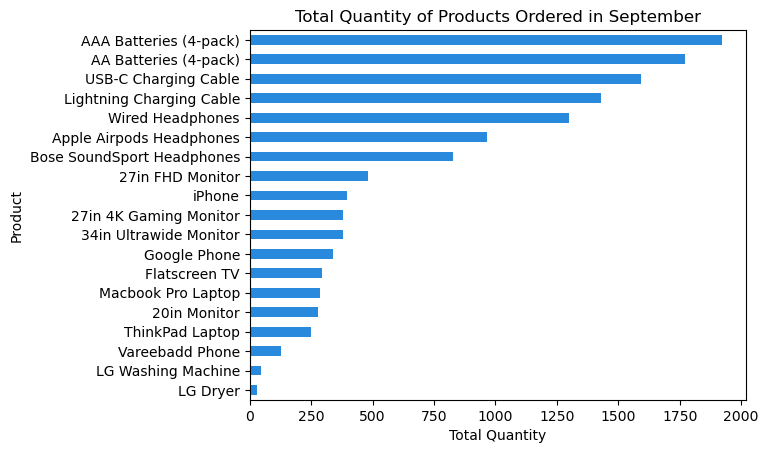

In [84]:
sep_df.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending = True).plot.barh(title = 'Total Quantity of Products Ordered in September', color = '#2989dd')
print(sep_df.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending = False))

plt.xlabel('Total Quantity')
plt.ylabel('Product')
plt.show()

##### Which day had the highest total sales?

Order_Date
2019-09-09    79444.04
2019-09-14    79399.76
2019-09-25    78245.17
2019-09-13    78224.28
2019-09-11    77830.23
2019-09-26    77607.77
2019-09-18    76551.31
2019-09-12    74776.11
2019-09-10    74257.35
2019-09-15    73242.32
2019-09-29    73135.43
2019-09-02    72260.43
2019-09-30    72105.25
2019-09-28    71946.63
2019-09-04    71784.82
2019-09-07    70665.44
2019-09-06    70087.10
2019-09-23    70082.03
2019-09-01    67913.39
2019-09-05    67822.56
2019-09-24    66751.42
2019-09-27    66319.23
2019-09-08    63948.30
2019-09-19    63822.47
2019-09-20    63013.83
2019-09-21    62876.26
2019-09-17    62443.57
2019-09-03    62059.34
2019-09-16    57940.24
2019-09-22    47909.61
Name: Sales, dtype: float64


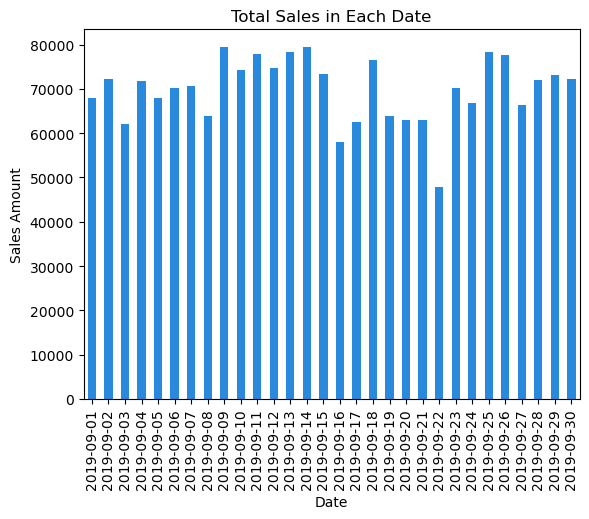

In [85]:
sep_df.groupby(sep_df.Order_Date.dt.date)['Sales'].sum().plot.bar(title = 'Total Sales in Each Date', color = '#2989dd')
print(sep_df.groupby(sep_df.Order_Date.dt.date)['Sales'].sum().sort_values(ascending = False))

plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

##### What time the products should be sold to increase the trend of customers purchasing the product?

Hour
12    897
13    874
11    865
19    864
17    852
21    841
18    829
14    825
20    811
10    700
Name: Quantity_Ordered, dtype: int64


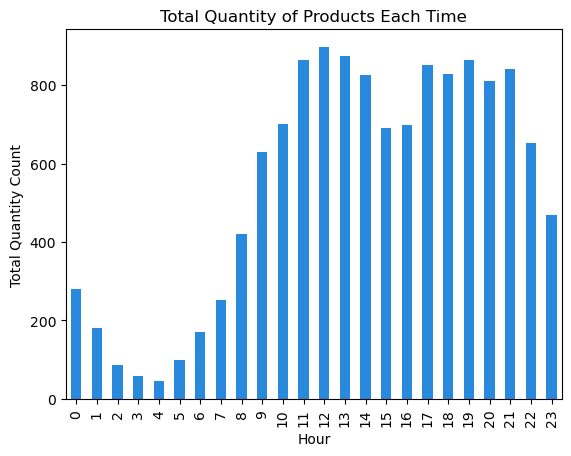

In [86]:
sep_df.groupby('Hour')['Quantity_Ordered'].sum().plot.bar(title = 'Total Quantity of Products Each Time', color = '#2989dd')
print(sep_df.groupby('Hour')['Quantity_Ordered'].sum().sort_values(ascending = False).head(10))

plt.xlabel('Hour')
plt.ylabel('Total Quantity Count')
plt.show()

#### October 2019 Sales

In [87]:
# Filter sales data in october

oct_df = all_months[(all_months['Order_Date'] >= '2019-10-01') & (all_months['Order_Date'] <= '2019-10-31')]

oct_df.head()

,Order_ID,Product,Price_Each,Quantity_Ordered,Sales,Order_Date,Hour,Minute,Address,City,State,Zipcode
0,259358,34in Ultrawide Monitor,379.99,1,379.99,2019-10-28,10,56,609 Cherry St,Dallas,Texas,75001
1,259359,27in 4K Gaming Monitor,389.99,1,389.99,2019-10-28,17,26,225 5th St,Los Angeles,California,90001
2,259360,AAA Batteries (4-pack),2.99,2,5.98,2019-10-24,17,20,967 12th St,New York City,New York,10001
3,259361,27in FHD Monitor,149.99,1,149.99,2019-10-14,22,26,628 Jefferson St,New York City,New York,10001
4,259362,Wired Headphones,11.99,1,11.99,2019-10-07,16,10,534 14th St,Los Angeles,California,90001


In [88]:
oct_df.describe()

,Order_ID,Price_Each,Quantity_Ordered,Sales,Hour,Minute
count,20249.000000,20249.000000,20249.000000,20249.000000,20249.000000,20249.000000
mean,269060.896390,183.397146,1.119512,184.442583,14.330732,29.504025
std,5632.155067,334.286476,0.437341,334.363393,5.418645,17.265923
min,248643.000000,2.990000,1.000000,2.990000,0.000000,0.000000
25%,264194.000000,11.950000,1.000000,11.950000,11.000000,15.000000
50%,269070.000000,14.950000,1.000000,14.950000,15.000000,29.000000
75%,273935.000000,150.000000,1.000000,150.000000,19.000000,44.000000
max,278796.000000,1700.000000,8.000000,1999.980000,23.000000,59.000000


##### Which city has the highest total sales?

City
San Francisco    865800.33
Los Angeles      612282.32
New York City    486950.57
Boston           367003.51
Dallas           322920.64
Seattle          316841.32
Atlanta          306159.08
Portland         253788.91
Austin           203031.18
Name: Sales, dtype: float64


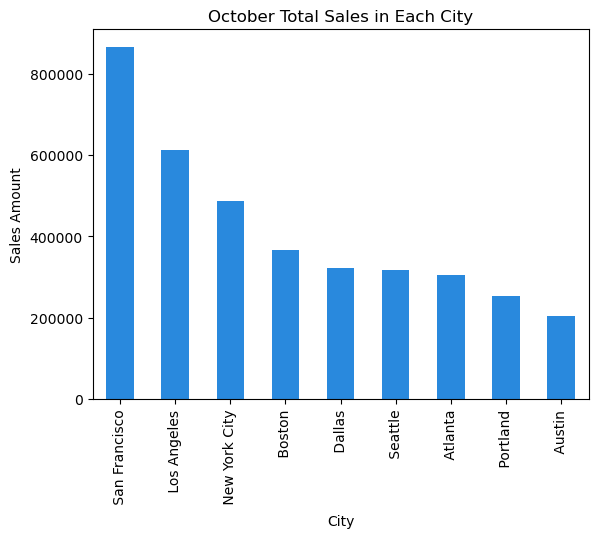

In [89]:
oct_df.groupby('City')['Sales'].sum().sort_values(ascending = False).plot.bar(title = 'October Total Sales in Each City', color = '#2989dd')
print(oct_df.groupby('City')['Sales'].sum().sort_values(ascending = False))

plt.xlabel('City')
plt.ylabel('Sales Amount')
plt.show()

##### Which product leads the highest quantity of order?

Product
AAA Batteries (4-pack)        3357
AA Batteries (4-pack)         2939
USB-C Charging Cable          2662
Lightning Charging Cable      2564
Wired Headphones              2270
Apple Airpods Headphones      1669
Bose SoundSport Headphones    1462
27in FHD Monitor               789
27in 4K Gaming Monitor         722
iPhone                         716
34in Ultrawide Monitor         671
Google Phone                   597
Macbook Pro Laptop             525
Flatscreen TV                  523
ThinkPad Laptop                461
20in Monitor                   428
Vareebadd Phone                203
LG Washing Machine              61
LG Dryer                        50
Name: Quantity_Ordered, dtype: int64


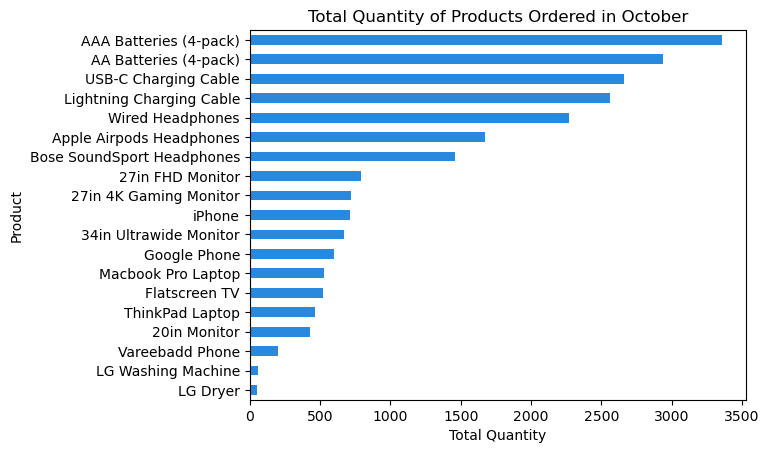

In [90]:
oct_df.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending = True).plot.barh(title = 'Total Quantity of Products Ordered in October', color = '#2989dd')
print(oct_df.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending = False))

plt.xlabel('Total Quantity')
plt.ylabel('Product')
plt.show()

##### Which day had the highest total sales?

Order_Date
2019-10-06    134384.92
2019-10-22    134168.94
2019-10-01    133430.38
2019-10-29    132715.35
2019-10-17    130677.85
2019-10-31    130070.35
2019-10-20    129369.48
2019-10-14    128103.24
2019-10-26    126993.86
2019-10-28    126468.55
2019-10-10    125440.59
2019-10-12    124750.10
2019-10-25    123893.12
2019-10-13    122900.14
2019-10-05    122682.14
2019-10-07    121833.37
2019-10-04    121014.29
2019-10-18    119552.73
2019-10-27    119312.37
2019-10-23    118223.55
2019-10-19    117234.62
2019-10-11    116727.86
2019-10-02    115350.78
2019-10-21    114909.48
2019-10-16    113957.87
2019-10-24    109791.67
2019-10-08    108477.64
2019-10-15    107623.75
2019-10-09    105991.13
2019-10-03     99928.92
2019-10-30     98798.82
Name: Sales, dtype: float64


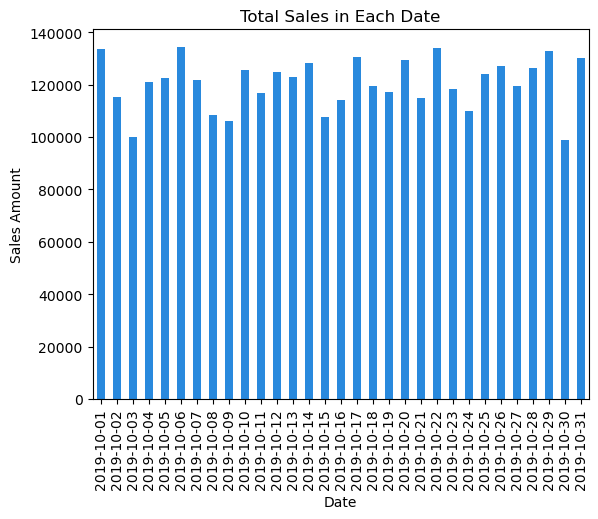

In [91]:
oct_df.groupby(oct_df.Order_Date.dt.date)['Sales'].sum().plot.bar(title = 'Total Sales in Each Date', color = '#2989dd')
print(oct_df.groupby(oct_df.Order_Date.dt.date)['Sales'].sum().sort_values(ascending = False))

plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

##### What time the products should be sold to increase the trend of customers purchasing the product?

Hour
12    1613
19    1601
11    1541
13    1494
18    1445
20    1443
10    1414
16    1353
21    1318
14    1309
Name: Quantity_Ordered, dtype: int64


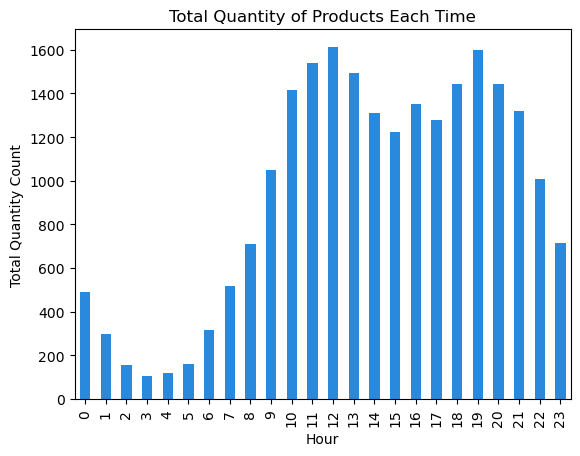

In [92]:
oct_df.groupby('Hour')['Quantity_Ordered'].sum().plot.bar(title = 'Total Quantity of Products Each Time', color = '#2989dd')
print(oct_df.groupby('Hour')['Quantity_Ordered'].sum().sort_values(ascending = False).head(10))

plt.xlabel('Hour')
plt.ylabel('Total Quantity Count')
plt.show()

#### November 2019 Sales

In [93]:
# Filter sales data in november

nov_df = all_months[(all_months['Order_Date'] >= '2019-11-01') & (all_months['Order_Date'] <= '2019-11-30')]

nov_df.head()

,Order_ID,Product,Price_Each,Quantity_Ordered,Sales,Order_Date,Hour,Minute,Address,City,State,Zipcode
0,278797,Wired Headphones,11.99,1,11.99,2019-11-21,9,54,46 Park St,New York City,New York,10001
1,278798,USB-C Charging Cable,11.95,2,23.90,2019-11-17,10,3,962 Hickory St,Austin,Texas,73301
2,278799,Apple Airpods Headphones,150.00,1,150.00,2019-11-19,14,56,464 Cherry St,Los Angeles,California,90001
3,278800,27in FHD Monitor,149.99,1,149.99,2019-11-25,22,24,649 10th St,Seattle,Washington,98101
4,278801,Bose SoundSport Headphones,99.99,1,99.99,2019-11-09,13,56,522 Hill St,Boston,Massachusetts,02215


In [94]:
nov_df.describe()

,Order_ID,Price_Each,Quantity_Ordered,Sales,Hour,Minute
count,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000
mean,287216.339318,181.194285,1.126824,182.277420,14.502394,29.489797
std,4903.183017,330.445586,0.451919,330.306825,5.402649,17.263902
min,261127.000000,2.990000,1.000000,2.990000,0.000000,0.000000
25%,283010.750000,11.950000,1.000000,11.950000,11.000000,14.000000
50%,287230.500000,14.950000,1.000000,14.950000,15.000000,30.000000
75%,291442.250000,150.000000,1.000000,150.000000,19.000000,44.000000
max,295664.000000,1700.000000,8.000000,1700.000000,23.000000,59.000000


##### Which city has the highest total sales?

City
San Francisco    764502.40
Los Angeles      499633.96
New York City    428156.34
Boston           350834.08
Atlanta          275061.82
Seattle          252068.18
Dallas           248478.80
Portland         207876.94
Austin           171262.53
Name: Sales, dtype: float64


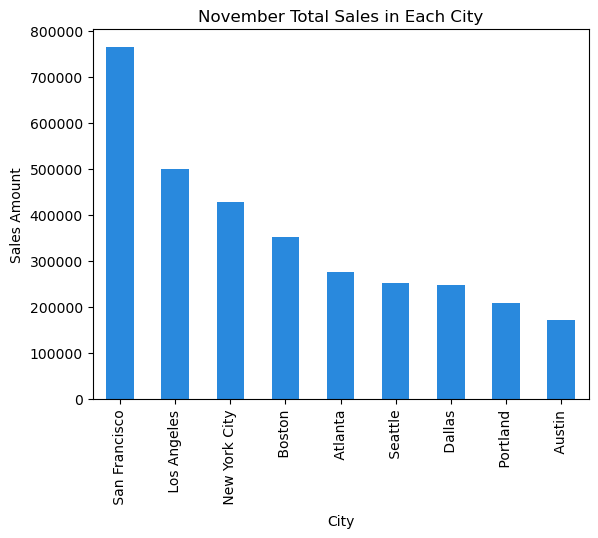

In [95]:
nov_df.groupby('City')['Sales'].sum().sort_values(ascending = False).plot.bar(title = 'November Total Sales in Each City', color = '#2989dd')
print(nov_df.groupby('City')['Sales'].sum().sort_values(ascending = False))

plt.xlabel('City')
plt.ylabel('Sales Amount')
plt.show()

##### Which product leads the highest quantity of order?

Product
AAA Batteries (4-pack)        3021
AA Batteries (4-pack)         2624
USB-C Charging Cable          2248
Lightning Charging Cable      2207
Wired Headphones              1928
Apple Airpods Headphones      1512
Bose SoundSport Headphones    1249
27in FHD Monitor               718
iPhone                         665
27in 4K Gaming Monitor         575
34in Ultrawide Monitor         551
Google Phone                   492
Flatscreen TV                  459
Macbook Pro Laptop             440
20in Monitor                   420
ThinkPad Laptop                374
Vareebadd Phone                177
LG Dryer                        56
LG Washing Machine              53
Name: Quantity_Ordered, dtype: int64


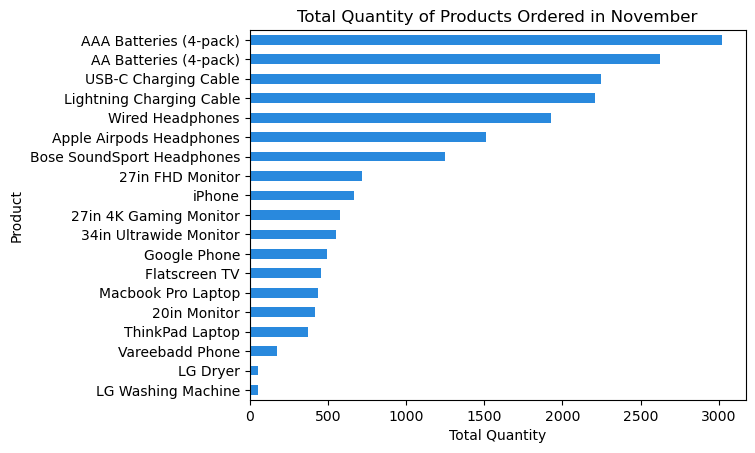

In [96]:
nov_df.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending = True).plot.barh(title = 'Total Quantity of Products Ordered in November', color = '#2989dd')
print(nov_df.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending = False))

plt.xlabel('Total Quantity')
plt.ylabel('Product')
plt.show()

##### Which day had the highest total sales?

Order_Date
2019-11-24    129644.50
2019-11-27    128007.27
2019-11-02    125772.34
2019-11-25    121062.75
2019-11-07    117692.05
2019-11-20    116780.62
2019-11-22    115864.33
2019-11-09    115750.99
2019-11-19    111324.54
2019-11-11    110645.82
2019-11-15    110547.06
2019-11-30    106921.73
2019-11-01    106908.90
2019-11-05    105602.75
2019-11-08    105233.89
2019-11-10    104955.40
2019-11-17    103977.55
2019-11-04    103637.24
2019-11-23    102594.45
2019-11-12    100467.22
2019-11-18    100269.26
2019-11-14     99566.52
2019-11-21     98589.00
2019-11-28     95929.38
2019-11-26     95908.72
2019-11-16     94222.52
2019-11-06     93916.89
2019-11-13     93540.57
2019-11-29     92642.55
2019-11-03     89898.24
Name: Sales, dtype: float64


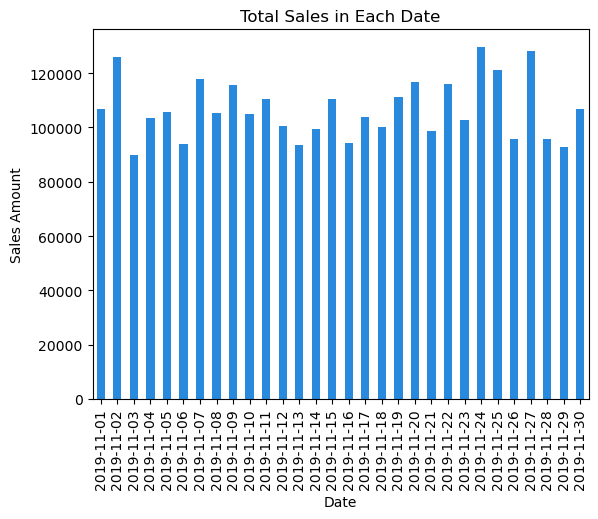

In [97]:
nov_df.groupby(nov_df.Order_Date.dt.date)['Sales'].sum().plot.bar(title = 'Total Sales in Each Date', color = '#2989dd')
print(nov_df.groupby(nov_df.Order_Date.dt.date)['Sales'].sum().sort_values(ascending = False))

plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

##### What time the products should be sold to increase the trend of customers purchasing the product?

Hour
20    1367
12    1354
19    1351
13    1339
11    1317
18    1315
17    1247
21    1200
14    1176
16    1126
Name: Quantity_Ordered, dtype: int64


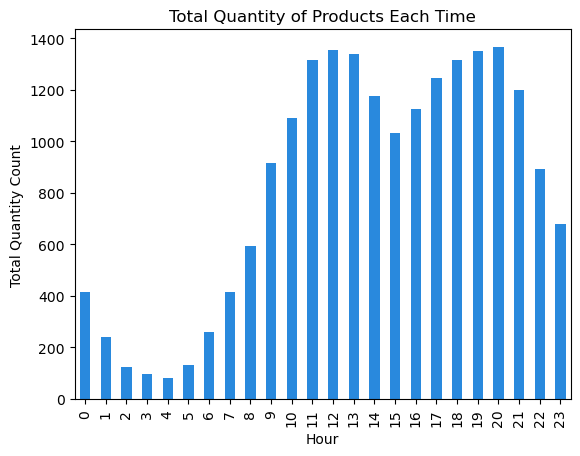

In [98]:
nov_df.groupby('Hour')['Quantity_Ordered'].sum().plot.bar(title = 'Total Quantity of Products Each Time', color = '#2989dd')
print(nov_df.groupby('Hour')['Quantity_Ordered'].sum().sort_values(ascending = False).head(10))

plt.xlabel('Hour')
plt.ylabel('Total Quantity Count')
plt.show()

#### December 2019 Sales

In [99]:
# Filter sales data in december

dec_df = all_months[(all_months['Order_Date'] >= '2019-12-01') & (all_months['Order_Date'] <= '2019-12-31')]

dec_df.head()

,Order_ID,Product,Price_Each,Quantity_Ordered,Sales,Order_Date,Hour,Minute,Address,City,State,Zipcode
0,295665,Macbook Pro Laptop,1700.00,1,1700.00,2019-12-30,0,1,136 Church St,New York City,New York,10001
1,295666,LG Washing Machine,600.00,1,600.00,2019-12-29,7,3,562 2nd St,New York City,New York,10001
2,295667,USB-C Charging Cable,11.95,1,11.95,2019-12-12,18,21,277 Main St,New York City,New York,10001
3,295668,27in FHD Monitor,149.99,1,149.99,2019-12-22,15,13,410 6th St,San Francisco,California,94016
4,295669,USB-C Charging Cable,11.95,1,11.95,2019-12-18,12,38,43 Hill St,Atlanta,Georgia,30301


In [100]:
dec_df.describe()

,Order_ID,Price_Each,Quantity_Ordered,Sales,Hour,Minute
count,24944.000000,24944.000000,24944.000000,24944.000000,24944.000000,24944.000000
mean,307634.978752,183.742294,1.125481,184.745658,14.409517,29.333106
std,6964.533947,332.997378,0.445626,332.820367,5.410258,17.327198
min,279095.000000,2.990000,1.000000,2.990000,0.000000,0.000000
25%,301632.750000,11.950000,1.000000,11.950000,11.000000,14.000000
50%,307646.500000,14.950000,1.000000,14.950000,15.000000,29.000000
75%,313650.250000,150.000000,1.000000,150.000000,19.000000,44.000000
max,319670.000000,1700.000000,7.000000,1700.000000,23.000000,59.000000


##### Which city has the highest total sales?

City
San Francisco    1105582.13
Los Angeles       682740.98
New York City     646508.85
Boston            509480.38
Seattle           386005.95
Dallas            380706.86
Atlanta           360494.32
Portland          303461.13
Austin            233315.10
Name: Sales, dtype: float64


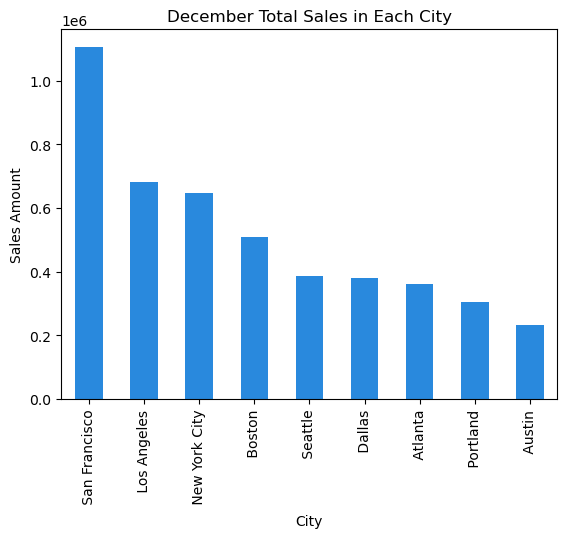

In [101]:
dec_df.groupby('City')['Sales'].sum().sort_values(ascending = False).plot.bar(title = 'December Total Sales in Each City', color = '#2989dd')
print(dec_df.groupby('City')['Sales'].sum().sort_values(ascending = False))

plt.xlabel('City')
plt.ylabel('Sales Amount')
plt.show()

##### Which product leads the highest quantity of order?

Product
AAA Batteries (4-pack)        4238
AA Batteries (4-pack)         3719
USB-C Charging Cable          3249
Lightning Charging Cable      3081
Wired Headphones              2740
Apple Airpods Headphones      2071
Bose SoundSport Headphones    1820
27in FHD Monitor               962
iPhone                         906
27in 4K Gaming Monitor         862
34in Ultrawide Monitor         848
Google Phone                   715
Flatscreen TV                  664
Macbook Pro Laptop             643
20in Monitor                   569
ThinkPad Laptop                537
Vareebadd Phone                284
LG Dryer                        86
LG Washing Machine              80
Name: Quantity_Ordered, dtype: int64


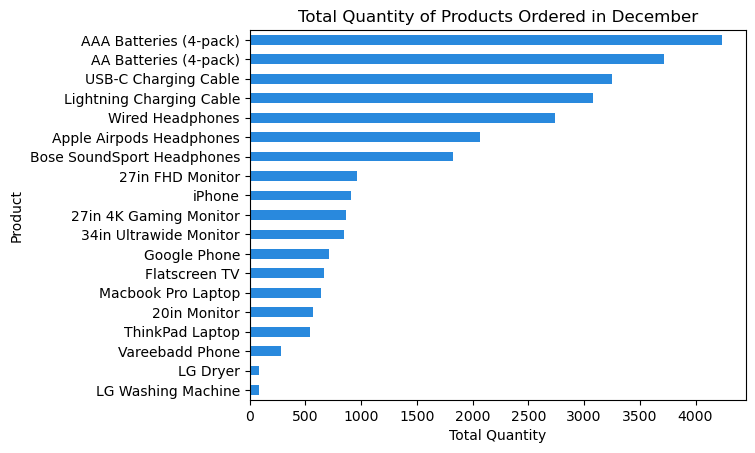

In [102]:
dec_df.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending = True).plot.barh(title = 'Total Quantity of Products Ordered in December', color = '#2989dd')
print(dec_df.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending = False))

plt.xlabel('Total Quantity')
plt.ylabel('Product')
plt.show()

##### Which day had the highest total sales?

Order_Date
2019-12-04    166577.69
2019-12-16    162970.61
2019-12-10    162820.75
2019-12-20    160178.31
2019-12-17    157357.04
2019-12-29    156009.67
2019-12-05    155079.30
2019-12-21    154656.88
2019-12-18    154598.77
2019-12-24    152888.82
2019-12-13    152767.20
2019-12-25    152268.42
2019-12-23    152064.45
2019-12-06    151910.47
2019-12-30    151857.82
2019-12-02    149021.87
2019-12-01    148123.73
2019-12-09    147131.29
2019-12-22    146928.21
2019-12-11    146367.03
2019-12-12    144183.16
2019-12-26    143896.20
2019-12-15    142889.73
2019-12-08    142527.64
2019-12-03    142470.46
2019-12-14    141841.78
2019-12-07    139530.81
2019-12-19    137732.67
2019-12-28    133601.53
2019-12-31    131439.32
2019-12-27    126604.07
Name: Sales, dtype: float64


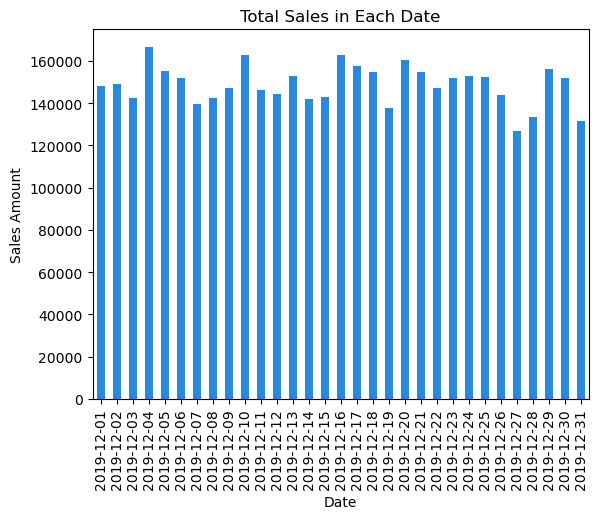

In [103]:
dec_df.groupby(dec_df.Order_Date.dt.date)['Sales'].sum().plot.bar(title = 'Total Sales in Each Date', color = '#2989dd')
print(dec_df.groupby(dec_df.Order_Date.dt.date)['Sales'].sum().sort_values(ascending = False))

plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

##### What time the products should be sold to increase the trend of customers purchasing the product?

Hour
19    2006
12    1916
11    1889
18    1879
20    1833
13    1823
10    1689
14    1685
21    1587
15    1575
Name: Quantity_Ordered, dtype: int64


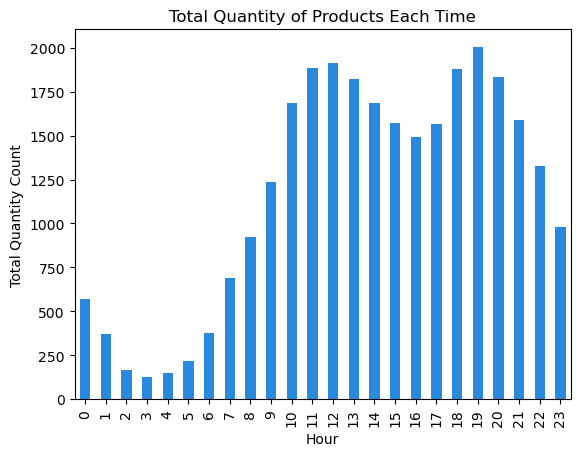

In [104]:
dec_df.groupby('Hour')['Quantity_Ordered'].sum().plot.bar(title = 'Total Quantity of Products Each Time', color = '#2989dd')
print(dec_df.groupby('Hour')['Quantity_Ordered'].sum().sort_values(ascending = False).head(10))

plt.xlabel('Hour')
plt.ylabel('Total Quantity Count')
plt.show()

#### Question 1: Calculate the total percentage change span from january up to december total sales in 2019.

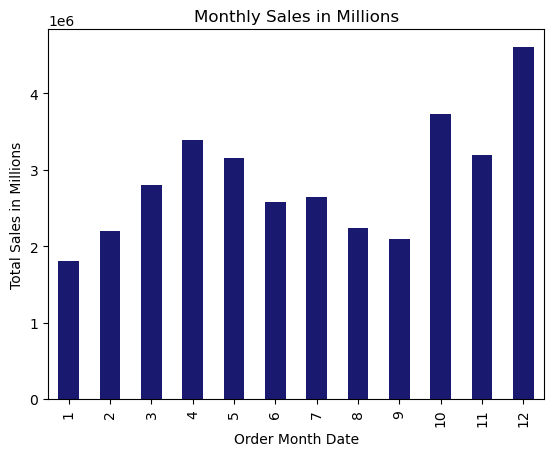

Order_Date
1     1812742.87
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: Sales, dtype: float64
Order_Date
1          NaN
2     0.213674
3     0.274943
4     0.208289
5    -0.070400
6    -0.182293
7     0.027241
8    -0.153177
9    -0.065423
10    0.783165
11   -0.143758
12    0.441049
Name: Sales, dtype: float64
The total percentage change of total sales from month to month is 133.33094557126057 %


In [105]:
all_months.groupby(all_months.Order_Date.dt.month)['Sales'].sum().plot.bar(title = 'Monthly Sales in Millions', color = '#191970')

plt.xlabel('Order Month Date')
plt.ylabel('Total Sales in Millions')
plt.show()

print(all_months.groupby(all_months.Order_Date.dt.month)['Sales'].sum())

# Store the total sale categorized by month to a new variable
sale_month = all_months.groupby(all_months.Order_Date.dt.month)['Sales'].sum()

# Calculate the total percentage change from month to month
pct_change = sale_month.pct_change()

print(pct_change)
print('The total percentage change of total sales from month to month is', pct_change.sum()*100, '%')

#### Question 2: Which city has the highest total sales?

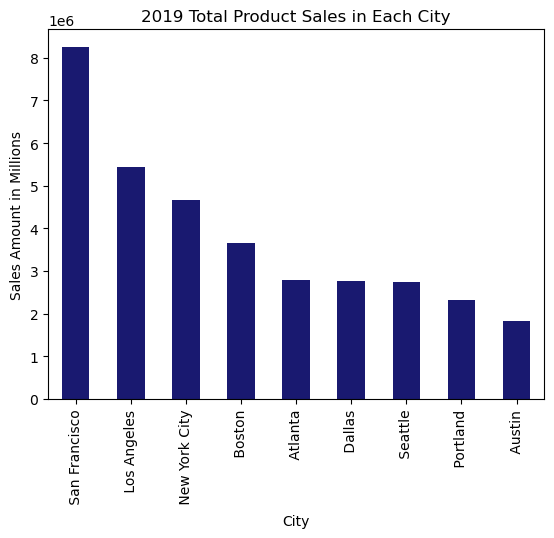

City
San Francisco    8252258.67
Los Angeles      5447304.29
New York City    4660526.52
Boston           3657300.76
Atlanta          2794199.07
Dallas           2763659.01
Seattle          2744896.03
Portland         2319178.95
Austin           1817544.35
Name: Sales, dtype: float64


In [106]:
# Visualize in a horizontal bar chart

all_months.groupby('City')['Sales'].sum().sort_values(ascending = False).plot.bar(title = '2019 Total Product Sales in Each City', color = '#191970')

plt.xlabel('City')
plt.ylabel('Sales Amount in Millions')
plt.show()

print(all_months.groupby('City')['Sales'].sum().sort_values(ascending = False))

#### Question 3: What product has the highest quantity ordered in 2019?

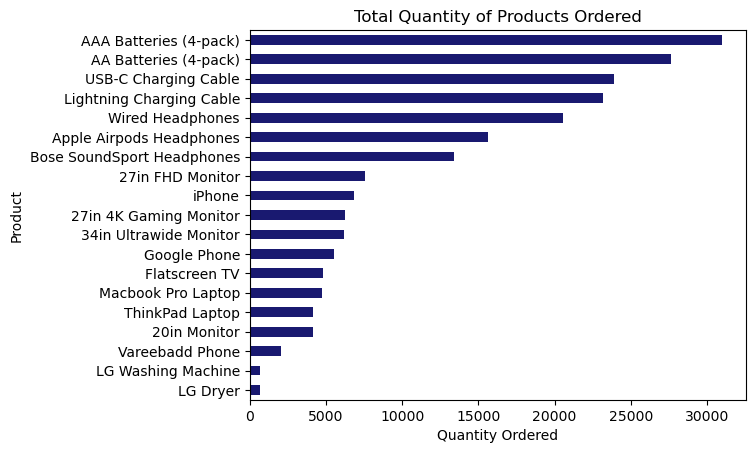

Product
AAA Batteries (4-pack)        30981
AA Batteries (4-pack)         27615
USB-C Charging Cable          23927
Lightning Charging Cable      23163
Wired Headphones              20520
Apple Airpods Headphones      15633
Bose SoundSport Headphones    13427
27in FHD Monitor               7538
iPhone                         6845
27in 4K Gaming Monitor         6238
34in Ultrawide Monitor         6192
Google Phone                   5528
Flatscreen TV                  4812
Macbook Pro Laptop             4724
ThinkPad Laptop                4126
20in Monitor                   4123
Vareebadd Phone                2067
LG Washing Machine              666
LG Dryer                        646
Name: Quantity_Ordered, dtype: int64


In [107]:
# Show the total sales of each city in a bar chart
all_months.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending = True).plot.barh(title = 'Total Quantity of Products Ordered', color = '#191970')

plt.xlabel('Quantity Ordered')
plt.ylabel('Product')
plt.show()

print(all_months.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending = False))

#### Question 4: What product has the highest price?

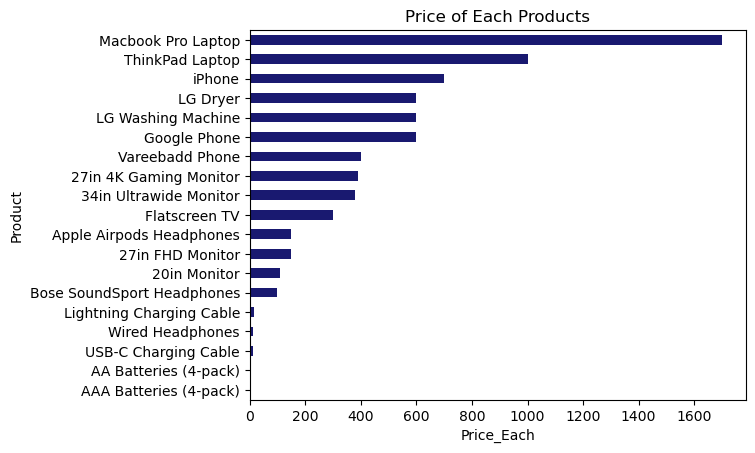

Product
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
iPhone                         700.00
LG Dryer                       600.00
LG Washing Machine             600.00
Google Phone                   600.00
Vareebadd Phone                400.00
27in 4K Gaming Monitor         389.99
34in Ultrawide Monitor         379.99
Flatscreen TV                  300.00
Apple Airpods Headphones       150.00
27in FHD Monitor               149.99
20in Monitor                   109.99
Bose SoundSport Headphones      99.99
Lightning Charging Cable        14.95
Wired Headphones                11.99
USB-C Charging Cable            11.95
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Name: Price_Each, dtype: float64


In [108]:
# Show the total sales of each city in a bar chart
all_months.groupby('Product')['Price_Each'].mean().sort_values(ascending = True).plot.barh(title = 'Price of Each Products', color = '#191970')

plt.xlabel('Price_Each')
plt.ylabel('Product')
plt.show()

print(all_months.groupby('Product')['Price_Each'].mean().sort_values(ascending = False))

#### Question 5: When was the highest total sale in a single day?

In [109]:
max_sale = all_months.groupby(all_months.Order_Date.dt.date)['Sales'].sum().sort_values(ascending = False)
print(max_sale)

print('The highest total sales in a single day is at December 4 with a total sale of', max_sale.max())

Order_Date
2019-12-04    166577.69
2019-12-16    162970.61
2019-12-10    162820.75
2019-12-20    160178.31
2019-12-17    157357.04
                ...    
2019-01-18     48469.74
2019-01-12     48111.46
2019-09-22     47909.61
2019-01-03     47046.20
2019-01-05     46524.63
Name: Sales, Length: 365, dtype: float64
The highest total sales in a single day is at December 4 with a total sale of 166577.69


#### Question 6: What do you make of the customers ordering on a different time?

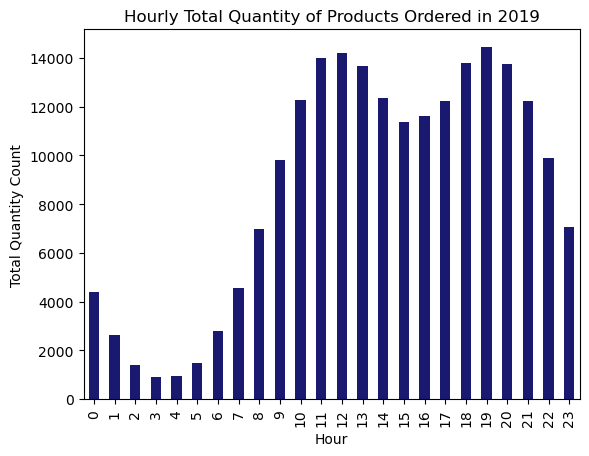

Hour
0      4404
1      2607
2      1393
3       921
4       931
5      1490
6      2809
7      4547
8      6998
9      9808
10    12292
11    13986
12    14188
13    13671
14    12343
15    11375
16    11636
17    12214
18    13785
19    14451
20    13758
21    12228
22     9884
23     7052
Name: Quantity_Ordered, dtype: int64
The highest total quantity of customer orders in a single day was at 7pm with a total quantity of 14451 products ordered.


In [110]:
max_order = all_months.groupby('Hour')['Quantity_Ordered'].sum().plot.bar(title = 'Hourly Total Quantity of Products Ordered in 2019', color = '#191970')

plt.xlabel('Hour')
plt.ylabel('Total Quantity Count')
plt.show()

max_order2 = all_months.groupby('Hour')['Quantity_Ordered'].sum()
print(all_months.groupby('Hour')['Quantity_Ordered'].sum())

print('The highest total quantity of customer orders in a single day was at 7pm with a total quantity of', max_order2.max(), 'products ordered.')

#### What do you make of the prices of the products and the quantity of order for each of the products?

In [111]:
# Get the list of the price and their price
price_list = all_months.groupby('Product')['Price_Each'].mean()
product_order = all_months.groupby('Product')['Quantity_Ordered'].sum()

# Convert group by result into dataframe
price_list = price_list.to_frame()
product_order = product_order.to_frame()

# Merge two dataframes
price_product = price_list.merge(product_order, how = 'outer', on = ['Product']).sort_values(by = 'Quantity_Ordered', ascending = False)

print(price_product)

                            Price_Each  Quantity_Ordered
Product                                                 
AAA Batteries (4-pack)            2.99             30981
AA Batteries (4-pack)             3.84             27615
USB-C Charging Cable             11.95             23927
Lightning Charging Cable         14.95             23163
Wired Headphones                 11.99             20520
Apple Airpods Headphones        150.00             15633
Bose SoundSport Headphones       99.99             13427
27in FHD Monitor                149.99              7538
iPhone                          700.00              6845
27in 4K Gaming Monitor          389.99              6238
34in Ultrawide Monitor          379.99              6192
Google Phone                    600.00              5528
Flatscreen TV                   300.00              4812
Macbook Pro Laptop             1700.00              4724
ThinkPad Laptop                 999.99              4126
20in Monitor                   

In [112]:
# Set product index to column
price_product.reset_index(inplace=True)

price_product

,Product,Price_Each,Quantity_Ordered
0,AAA Batteries (4-pack),2.99,30981
1,AA Batteries (4-pack),3.84,27615
2,USB-C Charging Cable,11.95,23927
3,Lightning Charging Cable,14.95,23163
4,Wired Headphones,11.99,20520
5,Apple Airpods Headphones,150.00,15633
6,Bose SoundSport Headphones,99.99,13427
7,27in FHD Monitor,149.99,7538
8,iPhone,700.00,6845
9,27in 4K Gaming Monitor,389.99,6238


C:\Users\Alfonse\AppData\Local\Temp\ipykernel_12020\2774832577.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)


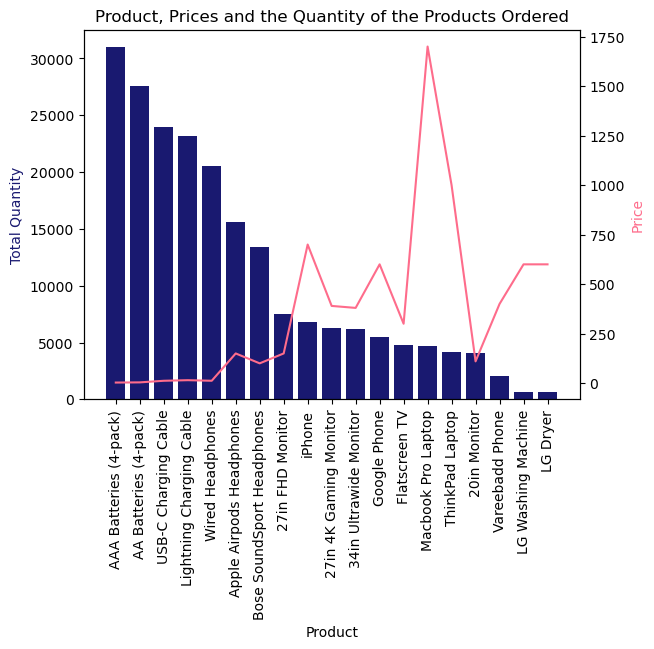

In [113]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(price_product.Product, price_product.Quantity_Ordered, color = '#191970')
ax2.plot(price_product.Product, price_product.Price_Each, color = '#fe6c8b')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_xlabel('Product')
ax1.set_ylabel('Total Quantity', color = '#191970')
ax2.set_ylabel('Price', color = '#fe6c8b')

plt.title('Product, Prices and the Quantity of the Products Ordered')
plt.show()
